In [227]:
import torch

layer_id = [0,31]
default = []

for k in [512, 256, 128]:
    for id in layer_id:
        default.append(torch.load(f'../../cache/llama/default/qkvout_k{k}_l{id}.pth', map_location=torch.device('cpu')))

In [228]:
default[0].keys()

dict_keys(['q', 'k', 'v', 'indices', 'mask_k', 'ks', 'attn', 'out', 'dense_queries', 'bq', 'bk', 'ensemble', 'layer_id'])

In [229]:
for df in default:
    print(df['indices'].shape)

torch.Size([32, 47, 256])
torch.Size([32, 47, 256])
torch.Size([32, 47, 128])
torch.Size([32, 47, 128])
torch.Size([32, 47, 64])
torch.Size([32, 47, 64])


In [230]:
import torch

ensemble_model_n = 20
ensemble_method_final_inter_thresh = [5, 10, 15, 20] # 10, 15, 20
ensemble_method_final_bdd_mask_k = [0,1]
lt = 32
ld = [0,31]

tlist = []

for thr in ensemble_method_final_inter_thresh:
    for l in ld:
        for bdd in ensemble_method_final_bdd_mask_k:
            # for lt in ensemble_layer_till:
                t = torch.load(f'../../cache/llama/ensemble/qkvout_ensbn{ensemble_model_n}_mft{thr}_bmk{bdd}_lt{lt}_l{l}.pth', map_location=torch.device('cpu'))
                tlist.append(t)

In [231]:
for tl in tlist:
    print(tl['indices'].shape)

torch.Size([32, 128, 421])
torch.Size([32, 128, 256])
torch.Size([32, 128, 423])
torch.Size([32, 128, 256])
torch.Size([32, 128, 288])
torch.Size([32, 128, 256])
torch.Size([32, 128, 284])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])


In [232]:
tlist[0]

{'q': tensor([[[[ 2.8906e-01, -1.5703e+00,  2.2188e+00,  ..., -7.5781e-01,
             5.8203e-01, -8.6719e-01],
           [ 4.6094e-01, -8.1250e-01,  1.1797e+00,  ..., -7.2266e-01,
             5.6250e-01, -8.2031e-01],
           [ 7.8906e-01, -1.9531e+00,  2.0469e+00,  ..., -8.3984e-01,
             6.8750e-01, -1.0156e+00],
           ...,
           [ 5.2734e-01,  8.7109e-01,  1.2031e+00,  ..., -5.8203e-01,
             1.7480e-01, -8.4766e-01],
           [ 1.0938e-01,  1.3906e+00,  1.5781e+00,  ..., -1.0234e+00,
             8.0859e-01, -1.1406e+00],
           [-1.3672e-02,  1.8594e+00,  1.4062e+00,  ..., -1.0859e+00,
             7.8906e-01, -1.1797e+00]],
 
          [[ 5.0964e-03,  1.1475e-01, -4.5703e-01,  ...,  5.1172e-01,
            -9.6094e-01,  6.2109e-01],
           [ 4.9805e-01,  5.2979e-02, -1.5625e+00,  ..., -5.4688e-01,
             4.0820e-01, -5.3516e-01],
           [ 1.0449e-01,  4.8340e-02, -5.9766e-01,  ...,  2.2461e-01,
            -6.3672e-01,  3.0078e-

In [233]:
import torch
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Function to plot a grid of heatmaps for attention maps
def plot_attention_maps(tensor, cmap='rainbow'):
    num_attention_maps = tensor.shape[0]
    grid_cols = math.ceil(math.sqrt(num_attention_maps))
    grid_rows = math.ceil(num_attention_maps / grid_cols)
    mask = (tensor == 32000)
    tensor = torch.where(mask, -1, tensor)
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < tensor.shape[0]:
            sns.heatmap(tensor[i][:], ax=ax, cmap=cmap, cbar=True)
            ax.set_title(f'Attention Map {i+1} {tensor[i].shape}')
            ax.axis('off')  # Optional: Hide the axis ticks
        else:
            ax.axis('off')  # Hide unused plots
    plt.tight_layout()
    plt.show()

# Calculate the number of rows and columns for the grid

In [234]:
tlist[0]

{'q': tensor([[[[ 2.8906e-01, -1.5703e+00,  2.2188e+00,  ..., -7.5781e-01,
             5.8203e-01, -8.6719e-01],
           [ 4.6094e-01, -8.1250e-01,  1.1797e+00,  ..., -7.2266e-01,
             5.6250e-01, -8.2031e-01],
           [ 7.8906e-01, -1.9531e+00,  2.0469e+00,  ..., -8.3984e-01,
             6.8750e-01, -1.0156e+00],
           ...,
           [ 5.2734e-01,  8.7109e-01,  1.2031e+00,  ..., -5.8203e-01,
             1.7480e-01, -8.4766e-01],
           [ 1.0938e-01,  1.3906e+00,  1.5781e+00,  ..., -1.0234e+00,
             8.0859e-01, -1.1406e+00],
           [-1.3672e-02,  1.8594e+00,  1.4062e+00,  ..., -1.0859e+00,
             7.8906e-01, -1.1797e+00]],
 
          [[ 5.0964e-03,  1.1475e-01, -4.5703e-01,  ...,  5.1172e-01,
            -9.6094e-01,  6.2109e-01],
           [ 4.9805e-01,  5.2979e-02, -1.5625e+00,  ..., -5.4688e-01,
             4.0820e-01, -5.3516e-01],
           [ 1.0449e-01,  4.8340e-02, -5.9766e-01,  ...,  2.2461e-01,
            -6.3672e-01,  3.0078e-

In [235]:
tlist[0]['indices'].shape

torch.Size([32, 128, 421])

In [236]:
(tlist[0]['indices']!=32000).sum()/(tlist[0]['indices'].shape[0]*tlist[0]['indices'].shape[1])

tensor(254.1479)

In [237]:
default[0]['indices'].shape

torch.Size([32, 47, 256])

In [238]:
default[0]['k'].shape

torch.Size([1, 32, 1500, 128])

In [239]:
tlist[0]['k'].shape

torch.Size([1, 32, 4096, 128])

In [240]:
default[0]['indices']<512

tensor([[[ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         ...,
         [ True,  True,  True,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         ...,
         [ True,  True,  True,  ..., False, False, False],
         [ True,  True,  True,  ..., False, False, False],
         [ True,  True,  True,  ..., False, False, False]],

        [[ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         ...,
         [ True,  True,  True,  ..., False, False, False],
         [

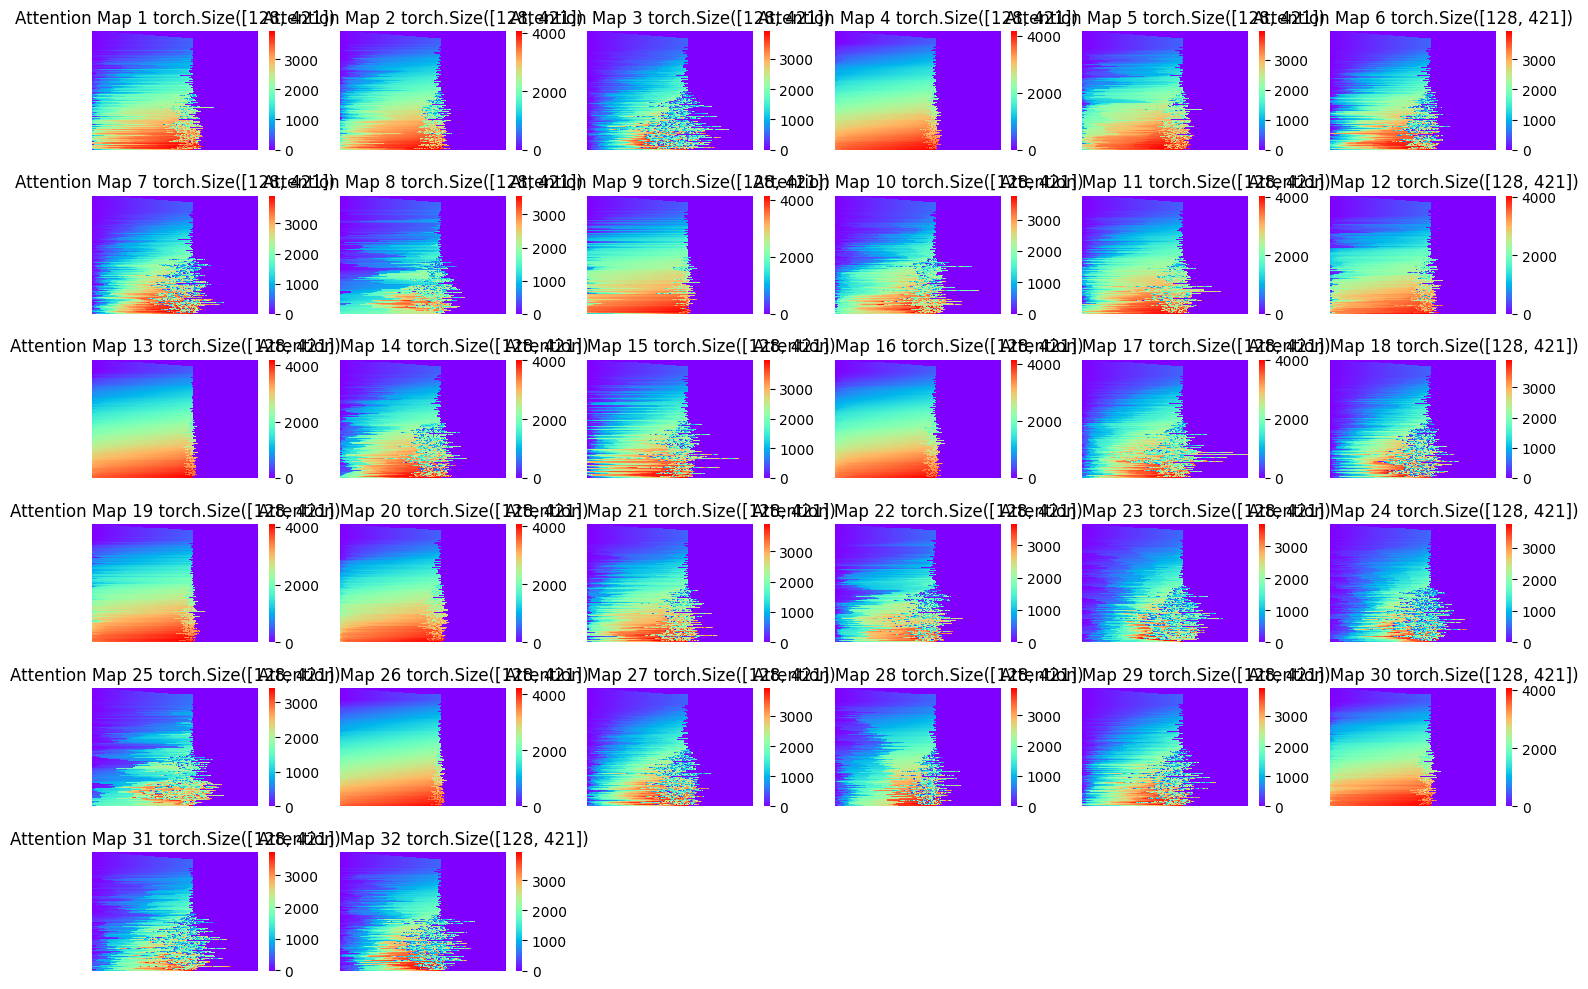

In [241]:
# Plot the attention maps with a specific colormap
plot_attention_maps(tlist[0]['indices'][:,:], cmap='rainbow')  # Change cmap as needed

In [242]:
default[0]

{'q': tensor([[[[ 0.3027, -0.7070,  1.2344,  ..., -0.6914,  0.5195, -0.8281],
           [ 0.5312, -1.5781,  2.1562,  ..., -0.9531,  0.7695, -1.0547],
           [ 0.7344, -1.1484,  1.6719,  ..., -0.8555,  0.7148, -0.9453],
           ...,
           [-1.1797,  0.4414, -0.1758,  ..., -0.7773,  0.4023, -0.8633],
           [-1.0938,  0.3789, -0.2432,  ..., -0.7773,  0.4023, -0.8633],
           [-0.9727,  0.3047, -0.3105,  ..., -0.7773,  0.4023, -0.8633]],
 
          [[ 0.3906, -0.0309, -1.5234,  ..., -0.5078,  0.3535, -0.4961],
           [ 0.1260,  0.0430, -0.7461,  ...,  0.1719, -0.5664,  0.2471],
           [ 0.3457, -0.0347, -1.3516,  ..., -0.1562, -0.0266, -0.1270],
           ...,
           [ 2.0156,  1.8906, -0.3242,  ..., -0.2578,  0.1553, -0.2373],
           [ 2.2812,  2.0312, -0.2285,  ..., -0.2578,  0.1553, -0.2373],
           [ 2.5000,  2.1562, -0.1270,  ..., -0.2578,  0.1553, -0.2373]],
 
          [[-0.6602, -0.5195, -0.5352,  ..., -0.4375, -0.3867, -0.3789],
        

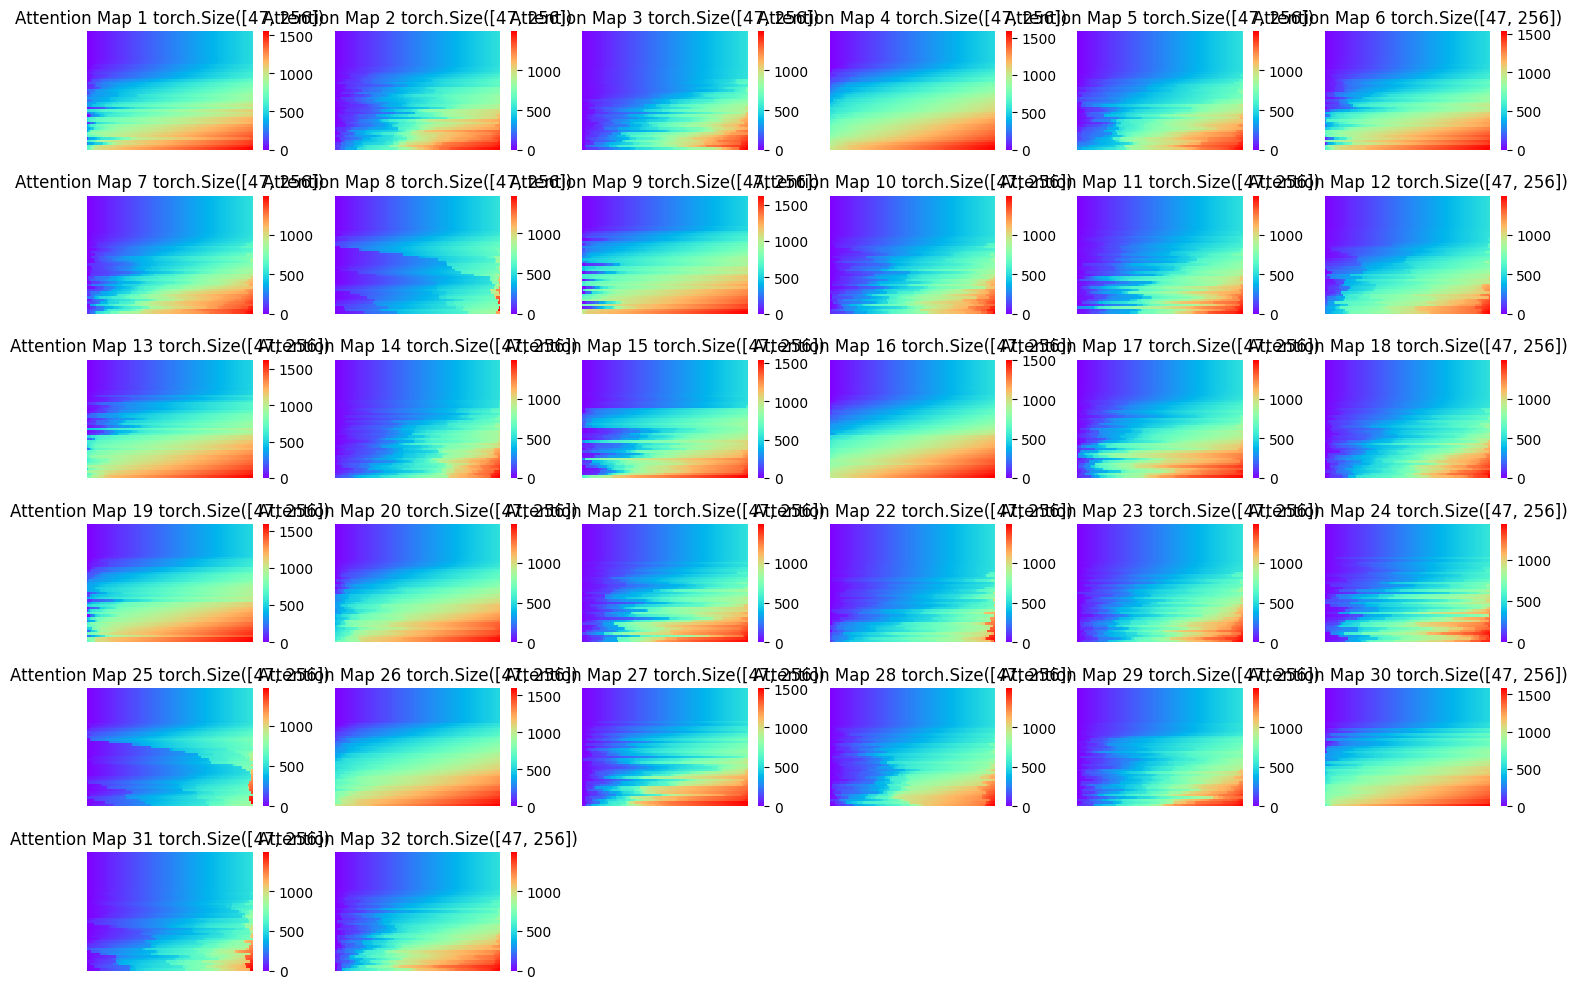

In [243]:
# Plot the attention maps with a specific colormap
plot_attention_maps(default[0]['indices'][:,:], cmap='rainbow')  # Change cmap as needed

In [289]:
default[0]['k'].shape

torch.Size([1, 32, 1500, 128])

In [244]:
t = torch.tensor([[[1, 2, 5, 5, 5, 5],
        [2, 3, 6, 5, 5, 5],
        [1, 4, 2, 5, 5, 5]],
        [[3, 4, 6, 5, 5, 5],
        [1, 3, 4, 4, 5, 5],
        [1, 1, 2, 5, 5, 5]]])

filtered_mask = t != 5

print(filtered_mask.shape, filtered_mask, filtered_mask.sum(-2).shape, )
print(filtered_mask.sum(-2))

is_zero = filtered_mask.sum(-2) == 0

# Determine which columns have all zeros
columns_with_all_zeros = torch.all(is_zero, dim=0)

# Find the first index where all values in a column are zero
first_column_with_all_zeros = torch.nonzero(columns_with_all_zeros, as_tuple=True)

# If there is at least one column with all zeros, get the first one
if len(first_column_with_all_zeros[0]) > 0:
    first_index = first_column_with_all_zeros[0][0].item()  # Get the index of the first such column
else:
    first_index = -1  # If no columns contain all zeros

print("First index where all values are zero:", first_index)
# zero_mask = (filtered_mask.sum(-2) == 0)

# columns_with_zero = torch.any(zero_mask, dim=0)
# # print(columns_with_zero)
# # Find the first column with at least one zero
# first_column_with_zero = torch.nonzero(columns_with_zero, as_tuple=True)

# # If there is at least one column with zero, get the first one
# if len(first_column_with_zero[0]) > 0:
#     first_index = first_column_with_zero[0][0].item()  # Get the index of the first column
# else:
#     first_index = -1  # If no columns contain zero

# print(t)
# print(first_column_with_zero)
# print("First column with zero:", first_index)
# zero_mask = filtered_mask == 0

# # Determine which columns have at least one zero
# columns_with_zero = torch.any(zero_mask, dim=0)

# # Find the first column with at least one zero
# first_column_with_zero = torch.nonzero(columns_with_zero, as_tuple=True)

# # If there is at least one column with zero, get the first one
# if len(first_column_with_zero[0]) > 0:
#     first_index = first_column_with_zero[0][0].item()  # Get the index of the first column
# else:
#     first_index = -1  # If no columns contain zero

# print(columns_with_zero)
# print("First column with zero:", first_index)

torch.Size([2, 3, 6]) tensor([[[ True,  True, False, False, False, False],
         [ True,  True,  True, False, False, False],
         [ True,  True,  True, False, False, False]],

        [[ True,  True,  True, False, False, False],
         [ True,  True,  True,  True, False, False],
         [ True,  True,  True, False, False, False]]]) torch.Size([2, 6])
tensor([[3, 3, 2, 0, 0, 0],
        [3, 3, 3, 1, 0, 0]])
First index where all values are zero: 4


In [245]:
import torch

# Example 3D tensor
t = torch.tensor([
    [[1, 2, 5, 5, 5, 5],
     [2, 3, 6, 4, 5, 5],
     [1, 4, 2, 5, 5, 5]],
    [[3, 4, 6, 5, 5, 5],
     [1, 3, 4, 2, 5, 5],
     [1, 1, 2, 4, 5, 5]]
])

# Create a mask to identify non-5 values
filtered_mask = t != 5

# Create a mask to identify where each row has no non-5 values (all are 5)
zero_mask = (filtered_mask.sum(-2) == 0)  # True where all rows are 5

# Check if any column has all zeroes
columns_with_zero = torch.any(zero_mask, dim=0)

# Find the last column with at least one zero by reversing the tensor
reversed_columns_with_zero = torch.flip(columns_with_zero, dims=[0])  # Reverse along the columns
last_column_with_zero = torch.nonzero(reversed_columns_with_zero, as_tuple=True)

# If there's at least one column with zero, find the last index
if len(last_column_with_zero[0]) > 0:
    # Get the last index (adjusting for the reversed position)
    last_index = len(columns_with_zero) - last_column_with_zero[0][0].item() - 1
else:
    last_index = -1  # If no columns contain zero

print(t)
print("Last column with zero:", last_index)


tensor([[[1, 2, 5, 5, 5, 5],
         [2, 3, 6, 4, 5, 5],
         [1, 4, 2, 5, 5, 5]],

        [[3, 4, 6, 5, 5, 5],
         [1, 3, 4, 2, 5, 5],
         [1, 1, 2, 4, 5, 5]]])
Last column with zero: 5


In [246]:
t = torch.tensor([[[5, 1, 5, 5, 1, 4],
        [5, 8, 4, 5, 2, 5],
        [5, 8, 4, 5, 4, 0]],
        [[3, 5, 4, 4, 5, 4],
        [5, 5, 4, 2, 5, 2],
        [5, 5, 2, 5, 5, 0]]])

filtered_mask = t == 5

columns_with_all_negative_one = torch.all(filtered_mask, dim=0)

# Get the first index where all rows have -1
nonzero_indices = torch.nonzero(columns_with_all_negative_one, as_tuple=True)

if len(nonzero_indices[0]) > 0:
    mask_k_i = nonzero_indices[0][0].item()
    # k_final = min(mask_k_i, ensemble_indices_k_size)
else:
    mask_k_i = -1  # If no such index is found
    # k_final = ensemble_indices_k_size

In [247]:
t

tensor([[[5, 1, 5, 5, 1, 4],
         [5, 8, 4, 5, 2, 5],
         [5, 8, 4, 5, 4, 0]],

        [[3, 5, 4, 4, 5, 4],
         [5, 5, 4, 2, 5, 2],
         [5, 5, 2, 5, 5, 0]]])

In [248]:
filtered_mask

tensor([[[ True, False,  True,  True, False, False],
         [ True, False, False,  True, False,  True],
         [ True, False, False,  True, False, False]],

        [[False,  True, False, False,  True, False],
         [ True,  True, False, False,  True, False],
         [ True,  True, False,  True,  True, False]]])

In [249]:
columns_with_all_negative_one

tensor([[False, False, False, False, False, False],
        [ True, False, False, False, False, False],
        [ True, False, False,  True, False, False]])

In [250]:
nonzero_indices

(tensor([1, 2, 2]), tensor([0, 0, 3]))

In [251]:
t = torch.tensor([[[2, 1, 3, 5, 5, 5],
        [5, 8, 4, 5, 2, 5],
        [5, 8, 4, 5, 4, 0]],
        [[3, 5, 4, 4, 5, 4],
        [5, 5, 4, 2, 5, 2],
        [5, 5, 2, 5, 5, 0]]])

filtered_mask = t == 5

columns_with_all_negative_one = torch.all(filtered_mask, dim=0)

# Get the first index where all rows have -1
nonzero_indices = torch.nonzero(columns_with_all_negative_one, as_tuple=True)

if len(nonzero_indices[0]) > 0:
    mask_k_i = nonzero_indices[0][0].item()
    # k_final = min(mask_k_i, ensemble_indices_k_size)
else:
    mask_k_i = -1  # If no such index is found
    # k_final = ensemble_indices_k_size

In [252]:
filtered_mask = t != 5

print(filtered_mask.shape, filtered_mask, filtered_mask.sum(-2).shape, )
print(filtered_mask.sum(-2))

zero_mask = (filtered_mask.sum(-2) == 0)

columns_with_zero = torch.any(zero_mask, dim=0)

# Find the first column with at least one zero
first_column_with_zero = torch.nonzero(columns_with_zero, as_tuple=True)

# If there is at least one column with zero, get the first one
if len(first_column_with_zero[0]) > 0:
    first_index = first_column_with_zero[0][0].item()  # Get the index of the first column
else:
    first_index = -1  # If no columns contain zero

print("First column with zero:", first_index)

torch.Size([2, 3, 6]) tensor([[[ True,  True,  True, False, False, False],
         [False,  True,  True, False,  True, False],
         [False,  True,  True, False,  True,  True]],

        [[ True, False,  True,  True, False,  True],
         [False, False,  True,  True, False,  True],
         [False, False,  True, False, False,  True]]]) torch.Size([2, 6])
tensor([[1, 3, 3, 0, 2, 1],
        [1, 0, 3, 2, 0, 3]])
First column with zero: 1


In [253]:
# import torch

# # Example 3D tensor
# tensor = torch.tensor([
#     [[1, 2, 3], [7, 8, 9]],  # Sorted along the last dimension
#     [[4, 5, 6], [1, 3, 2]],  # Not sorted
#     [[10, 11, 12], [13, 14, 15]]  # Sorted
# ])

# # Sort the tensor along the last dimension (dim=-1)
# sorted_tensor, _ = torch.sort(tensor, dim=-1)

# # Check if the original tensor is equal to the sorted version
# is_sorted = torch.equal(tensor, sorted_tensor)

# print("Is the tensor sorted in ascending order along the last dimension?", is_sorted)
# print(tensor.shape)


In [254]:
tensor = tlist[0]['indices']

# Sort the tensor along the last dimension (dim=-1)
sorted_tensor, _ = torch.sort(tensor, dim=-1)

# Check if the original tensor is equal to the sorted version
is_sorted = torch.equal(tensor, sorted_tensor)

In [255]:
def check_padding_continuitivity(tensor):
    # Create a mask to identify where 32000 appears in the last dimension
    is_32000 = tensor == 32000

    # Convert the mask to integer for argmax compatibility
    is_32000_int = is_32000.int()

    # Find the first occurrence of 32000 in the last dimension
    first_32000_indices = torch.where(torch.any(is_32000, dim=-1), torch.argmax(is_32000_int, dim=-1), -1)

    # Check if all elements from the first occurrence onward are 32000
    check_results = []
    for i in range(tensor.shape[0]):
        for j in range(tensor.shape[1]):
            start_idx = first_32000_indices[i][j]
            if start_idx == -1:  # No 32000 found in this slice
                check_results.append(True)  # Default to True if there's no 32000
            else:
                # Verify if all elements from start_idx to the end are 32000
                slice_to_check = tensor[i, j, start_idx:]
                is_all_32000 = torch.all(slice_to_check == 32000).item()
                check_results.append(is_all_32000)

    # Determine if all checks passed
    all_passed = all(check_results)

    # print(tensor)
    # print(first_32000_indices)
    # print(check_results)
    print("Does the last dimension have 32000 from the first occurrence?", all_passed)


In [256]:
for tl in tlist:
    check_padding_continuitivity(tl['indices'])

Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True


Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True
Does the last dimension have 32000 from the first occurrence? True


In [257]:
import torch

# Example 3D tensor with 32000 in some slices
tensor = tlist[0]['indices']

# Create a mask to identify where 32000 appears in the last dimension
is_32000 = tensor == 32000

# Convert the mask to integer for argmax compatibility
is_32000_int = is_32000.int()

# Find the first occurrence of 32000 in the last dimension
first_32000_indices = torch.where(torch.any(is_32000, dim=-1), torch.argmax(is_32000_int, dim=-1), -1)

# Check if all elements from the first occurrence onward are 32000
check_results = []
for i in range(tensor.shape[0]):
    for j in range(tensor.shape[1]):
        start_idx = first_32000_indices[i][j]
        if start_idx == -1:  # No 32000 found in this slice
            check_results.append(True)  # Default to True if there's no 32000
        else:
            # Verify if all elements from start_idx to the end are 32000
            slice_to_check = tensor[i, j, start_idx:]
            is_all_32000 = torch.all(slice_to_check == 32000).item()
            check_results.append(is_all_32000)

# Determine if all checks passed
all_passed = all(check_results)

# print(tensor)
# print(first_32000_indices)
# print(check_results)
print("Does the last dimension have 32000 from the first occurrence?", all_passed)


Does the last dimension have 32000 from the first occurrence? True


In [258]:
tlist[0]['indices']

tensor([[[0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         ...,
         [2.6300e+03, 2.6320e+03, 2.6340e+03,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [1.7660e+03, 1.7680e+03, 1.7700e+03,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [2.7200e+02, 2.7400e+02, 2.7600e+02,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04]],

        [[0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         ...,
         [2.7320e+03, 2.7340e+03, 2.7360e+03,  ..., 3.2000e+04,
          3.200

In [259]:
def find_first_32000(tensor):
    filtered_mask = tensor != 32000

    # print(filtered_mask.shape, filtered_mask, filtered_mask.sum(-2).shape, )
    # print(filtered_mask.sum(-2))

    is_zero = filtered_mask.sum(-2) == 0

    # Determine which columns have all zeros
    columns_with_all_zeros = torch.all(is_zero, dim=0)

    # Find the first index where all values in a column are zero
    first_column_with_all_zeros = torch.nonzero(columns_with_all_zeros, as_tuple=True)

    # If there is at least one column with all zeros, get the first one
    if len(first_column_with_all_zeros[0]) > 0:
        first_index = first_column_with_all_zeros[0][0].item()  # Get the index of the first such column
    else:
        first_index = -1  # If no columns contain all zeros

    print("First index where all values are zero:", first_index)

# columns_with_all_negative_one_inter = torch.all(filtered_mask, dim=0)
# columns_with_all_negative_one = torch.all(columns_with_all_negative_one_inter, dim=0)

# # Get the first index where all rows have -1
# nonzero_indices = torch.nonzero(columns_with_all_negative_one, as_tuple=True)

# if len(nonzero_indices[0]) > 0:
#     mask_k_i = nonzero_indices[0][0].item()
#     # k_final = min(mask_k_i, ensemble_indices_k_size)
# else:
#     mask_k_i = -1  # If no such index is found
#     # k_final = ensemble_indices_k_size

# # nonzero_indices[1].shape, nonzero_indices, mask_k_i
# print(filtered_mask.shape, columns_with_all_negative_one.shape)
# print(columns_with_all_negative_one.shape)
# print(nonzero_indices[0].shape)
# print(nonzero_indices[0])

In [260]:
for tl in tlist:
    find_first_32000(tl['indices'])

First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1
First index where all values are zero: -1


In [261]:
tlist[4]['indices'][16,:,-2:]

tensor([[32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [320

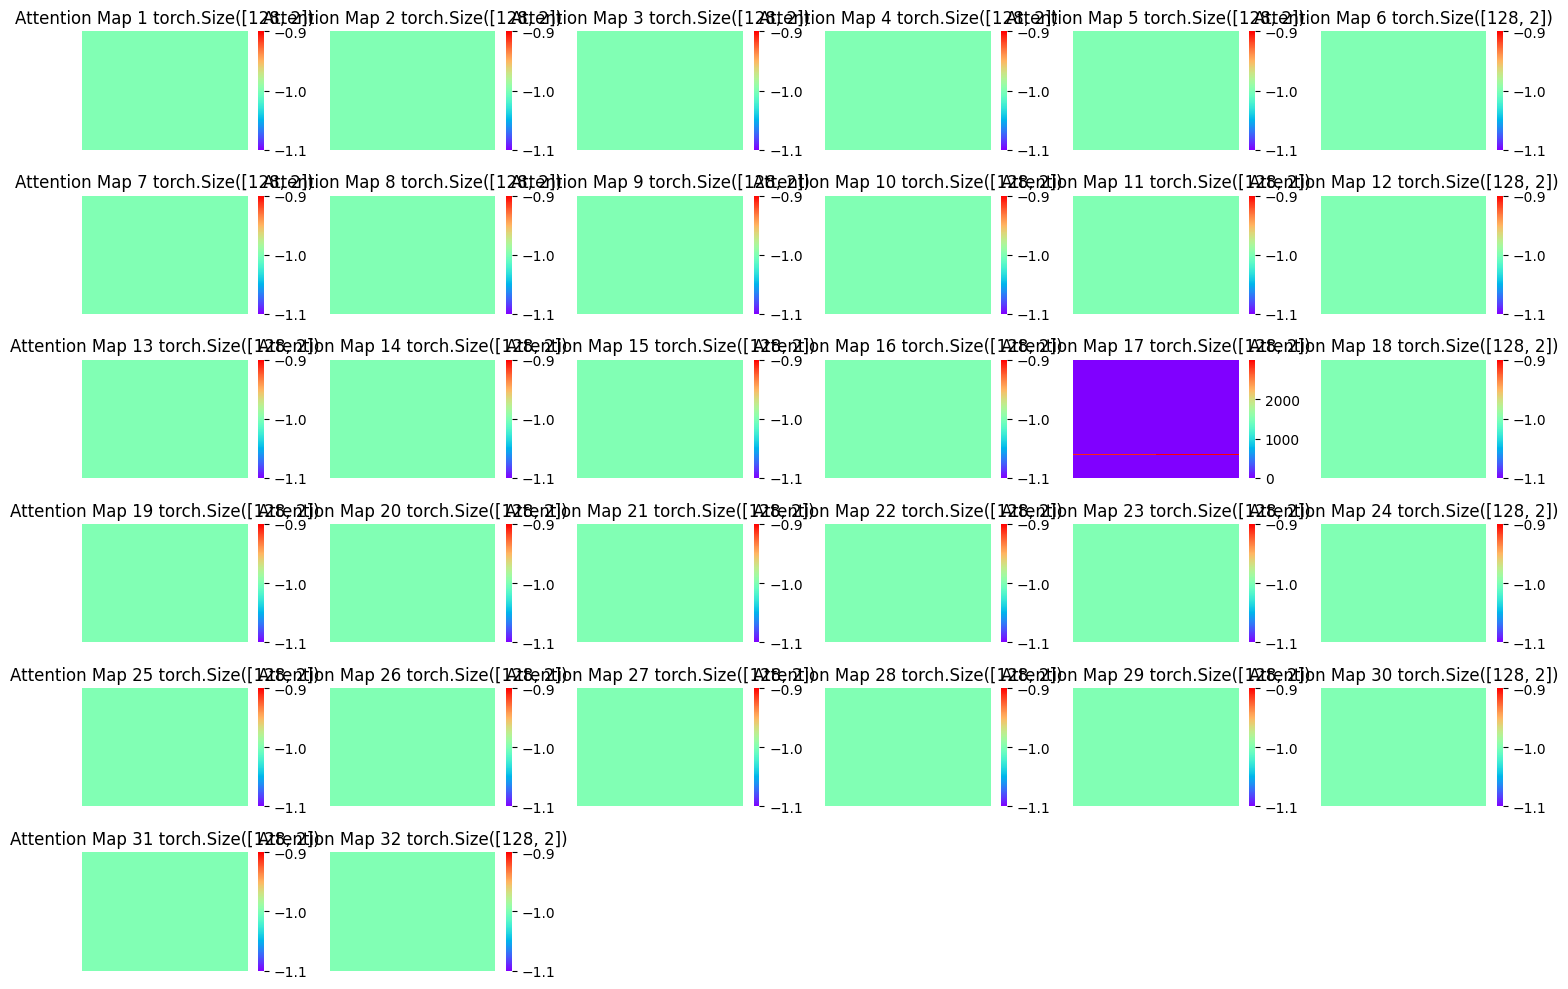

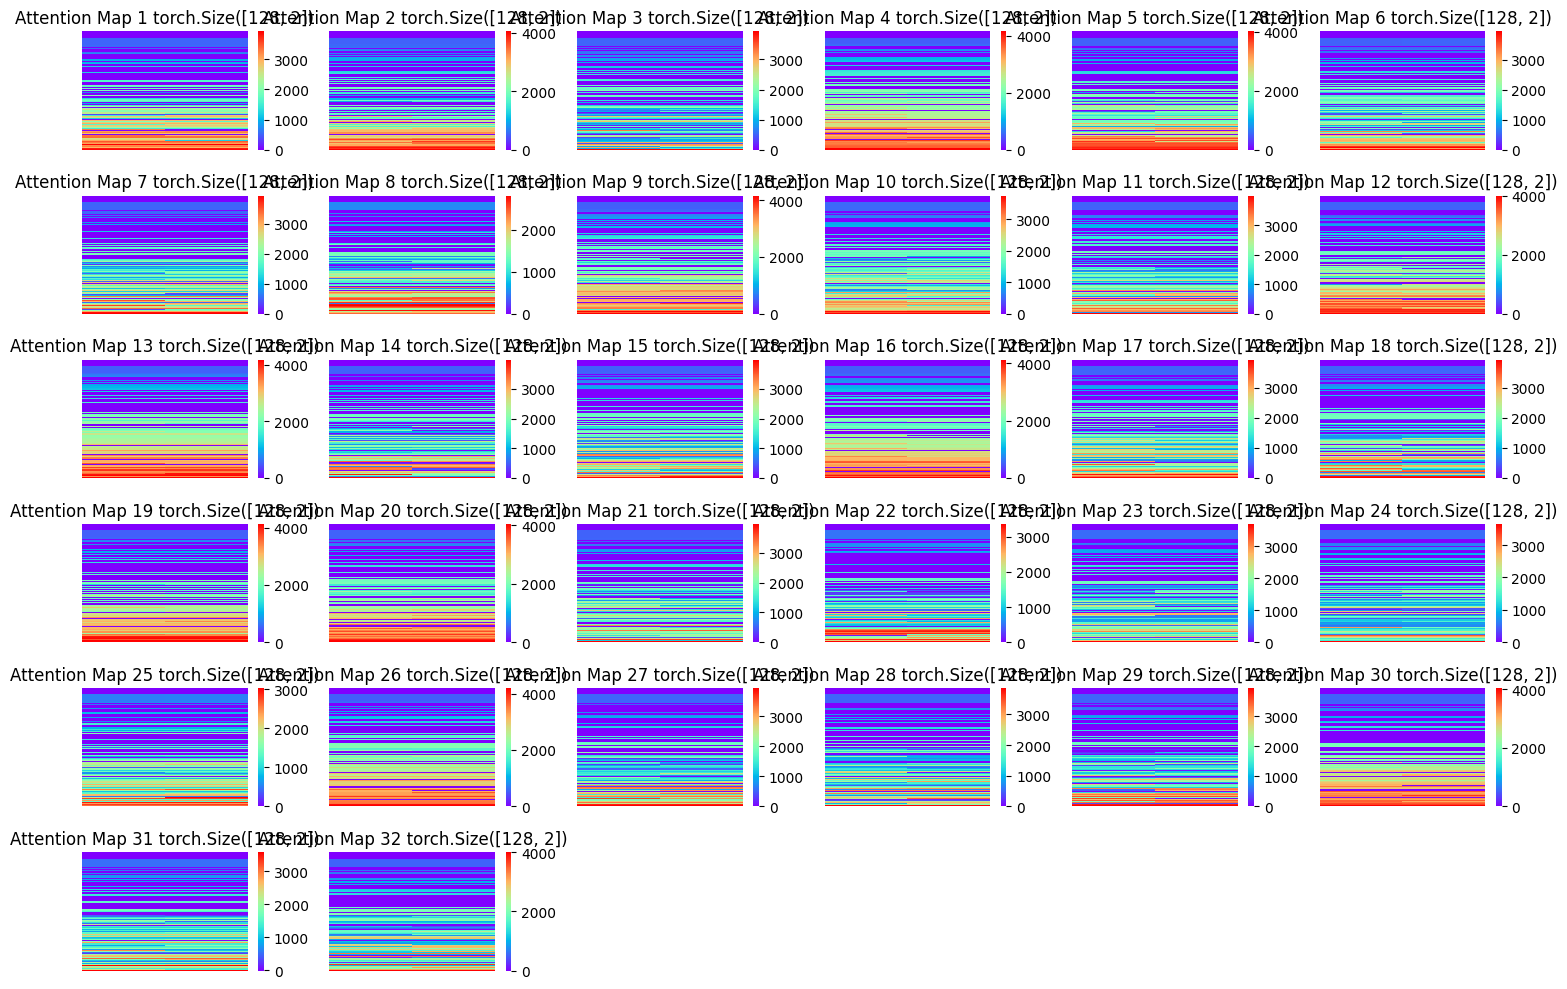

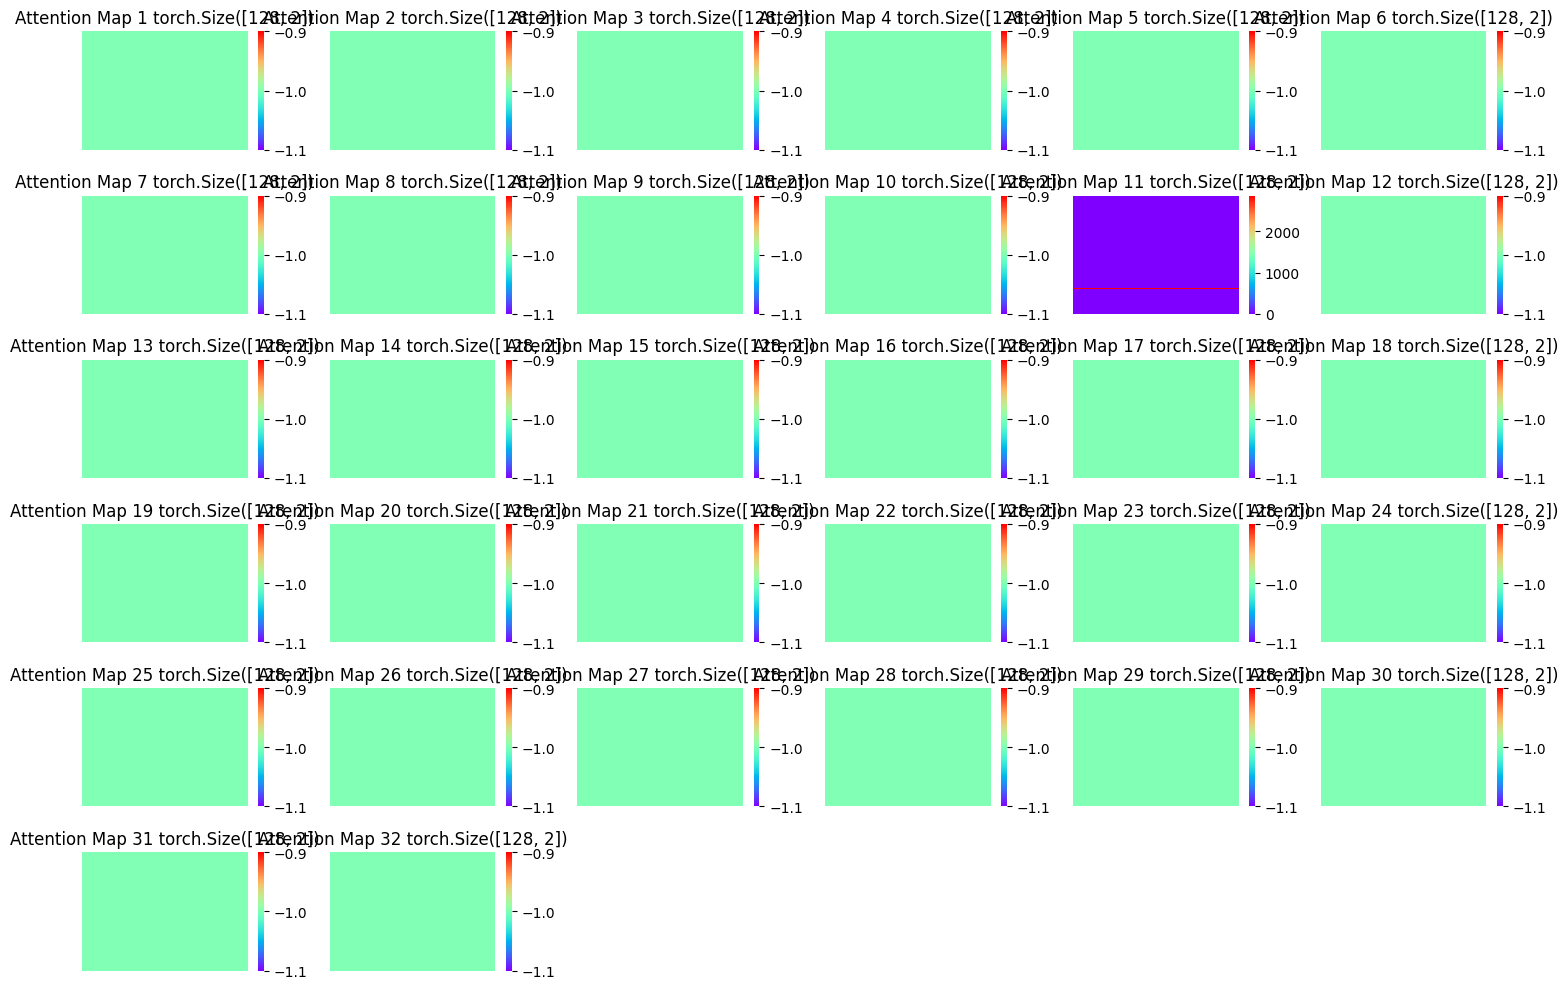

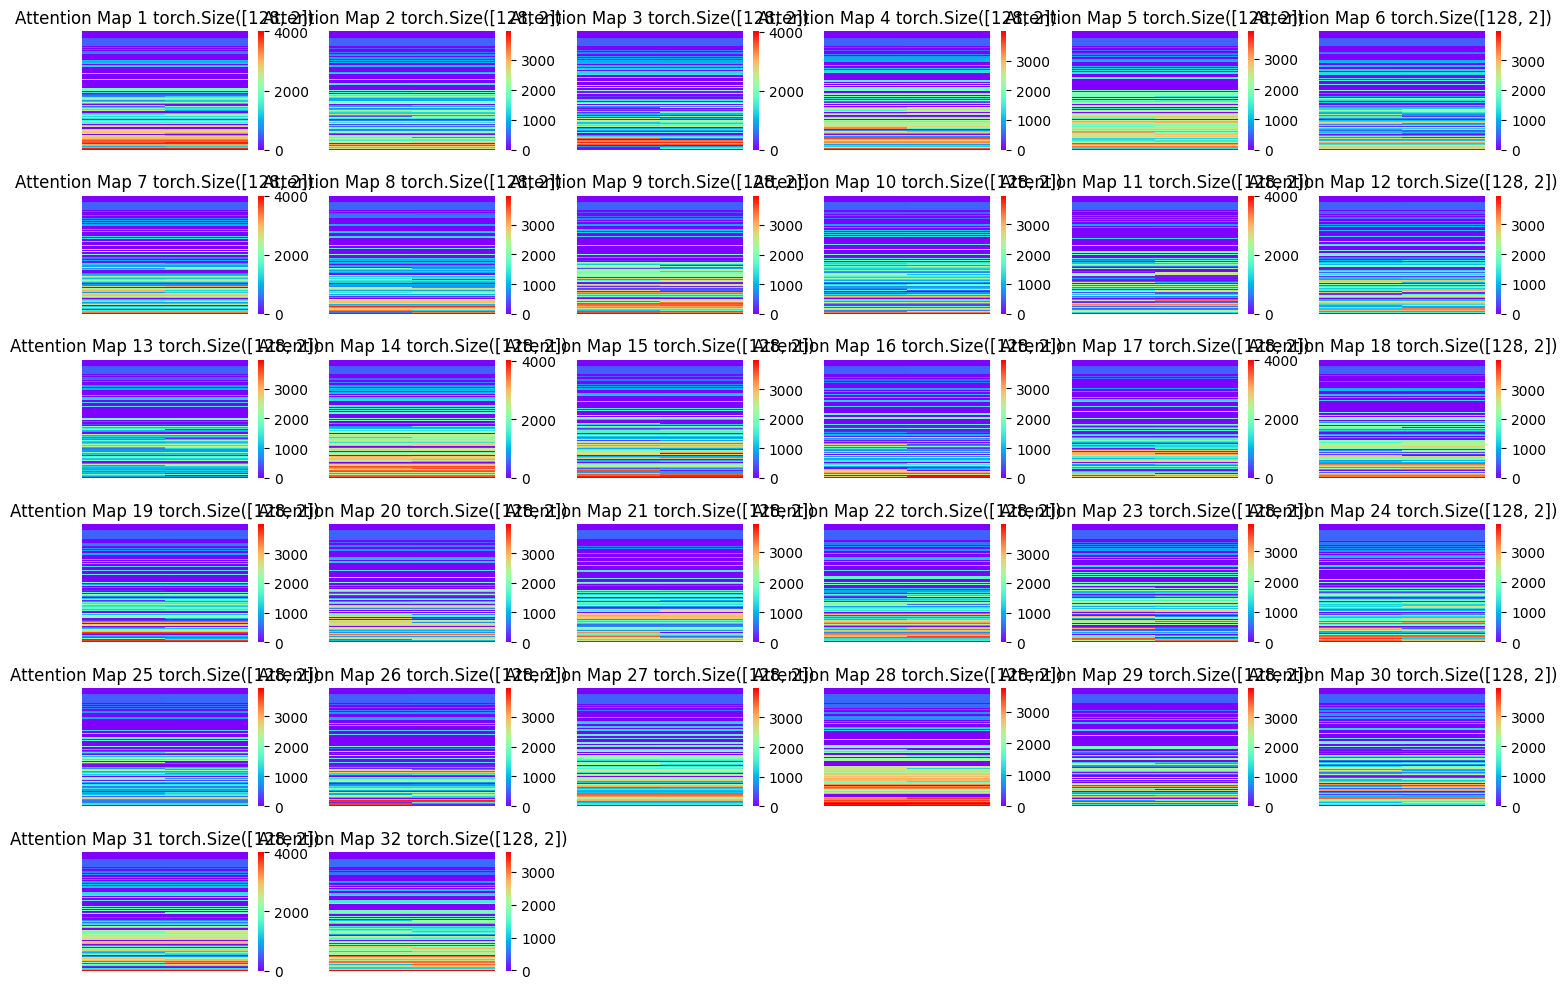

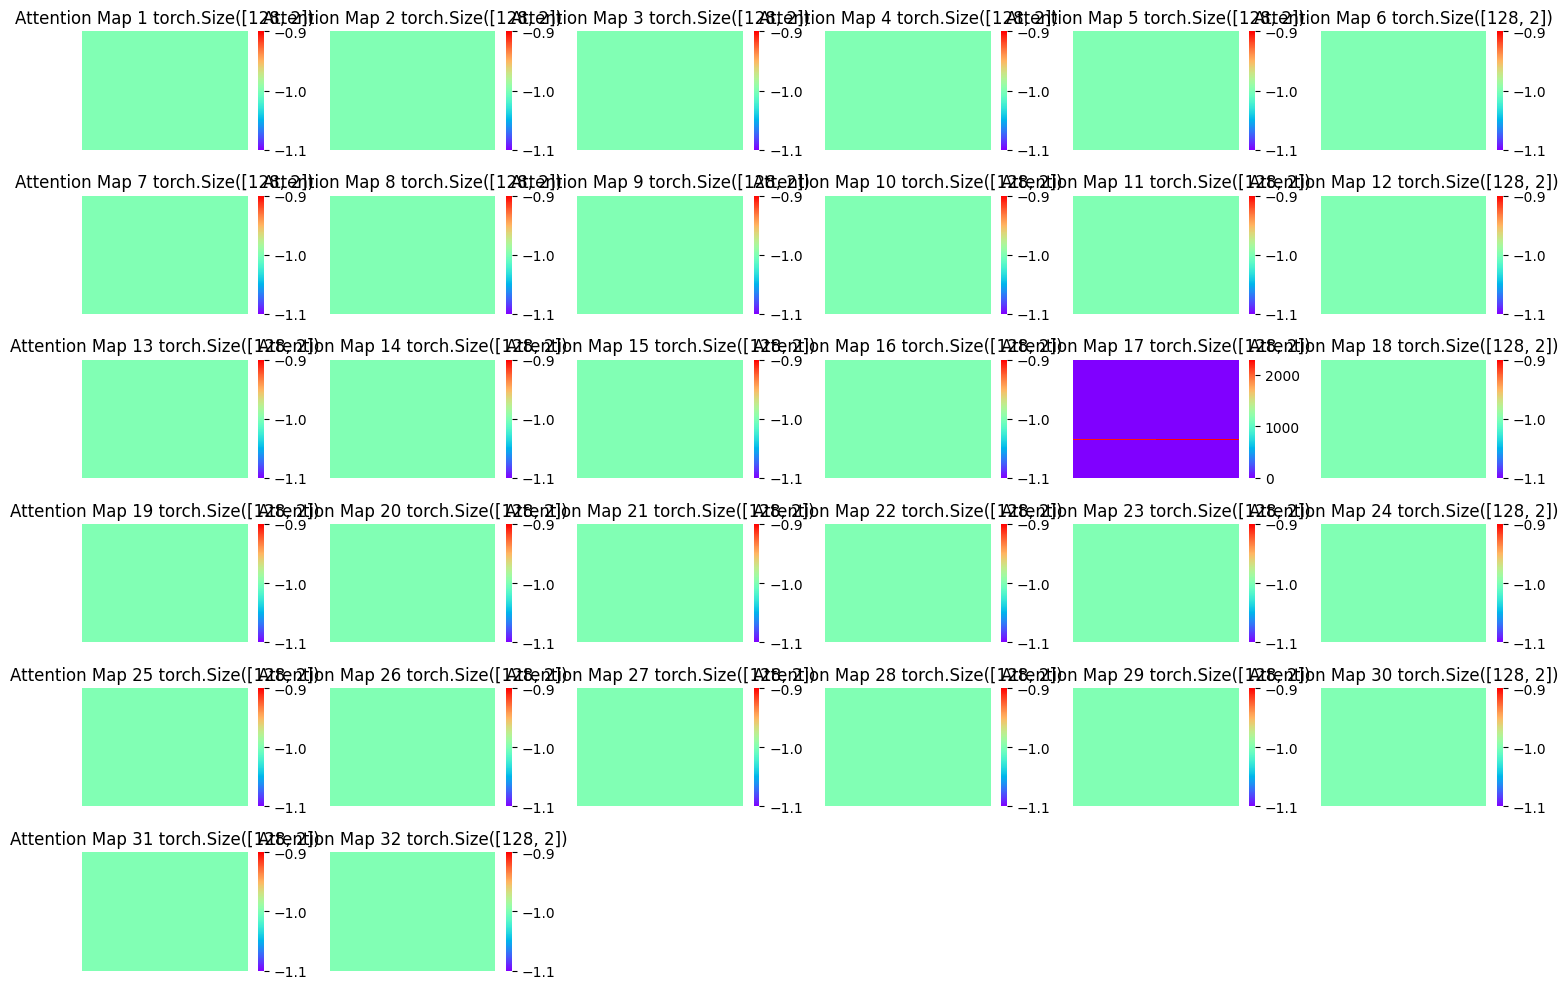

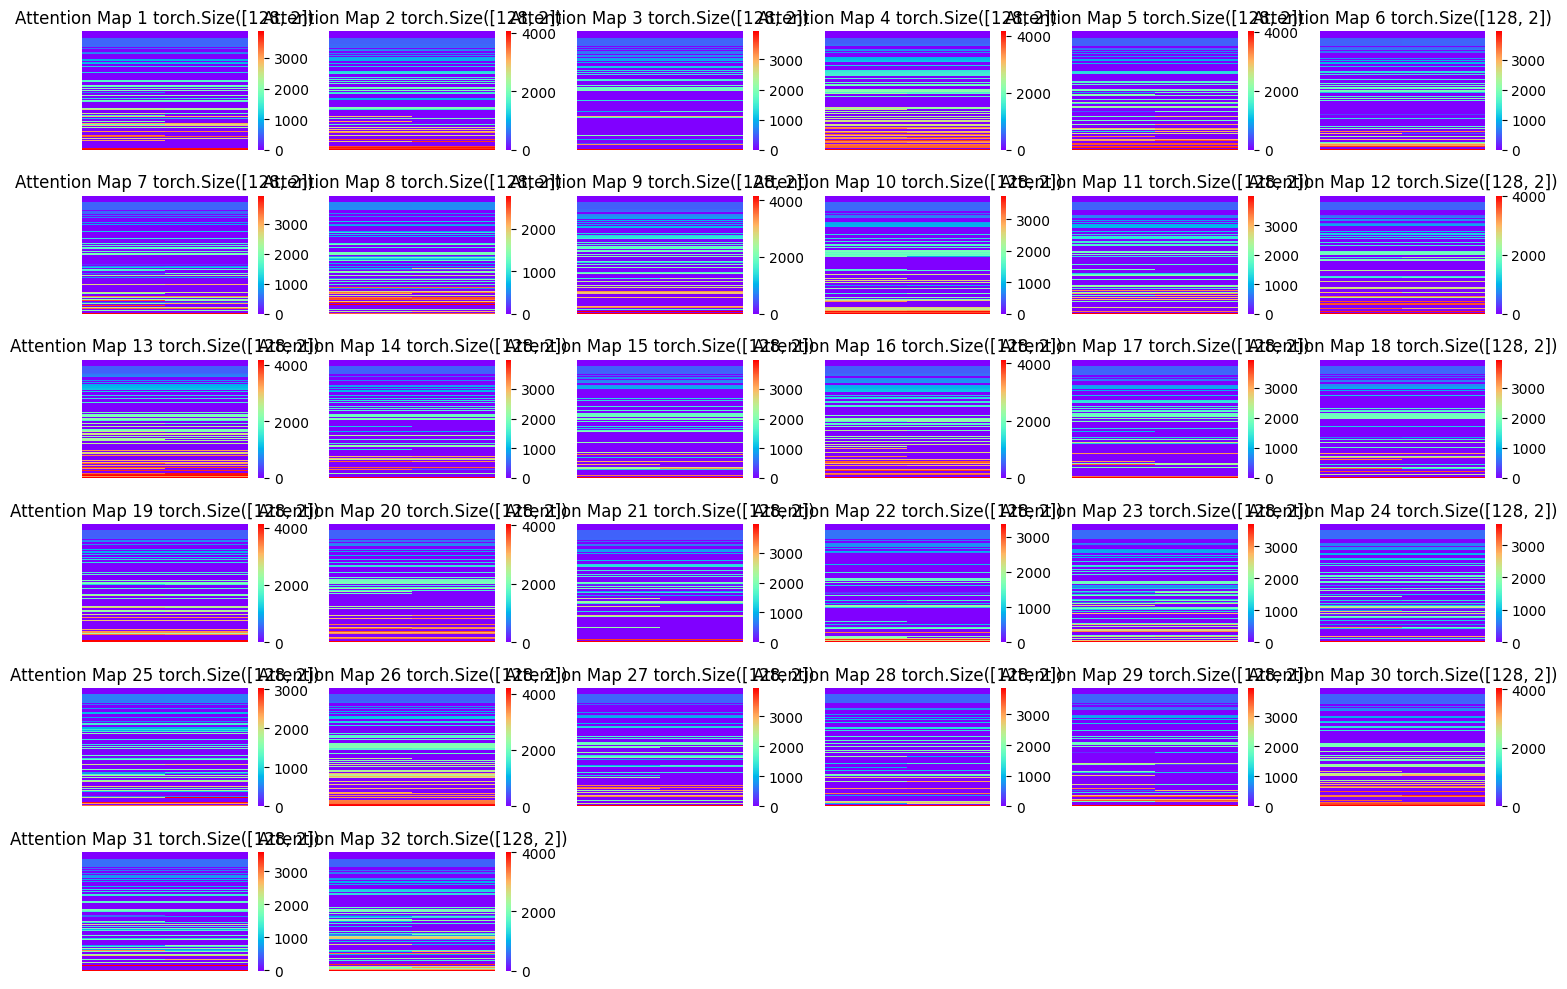

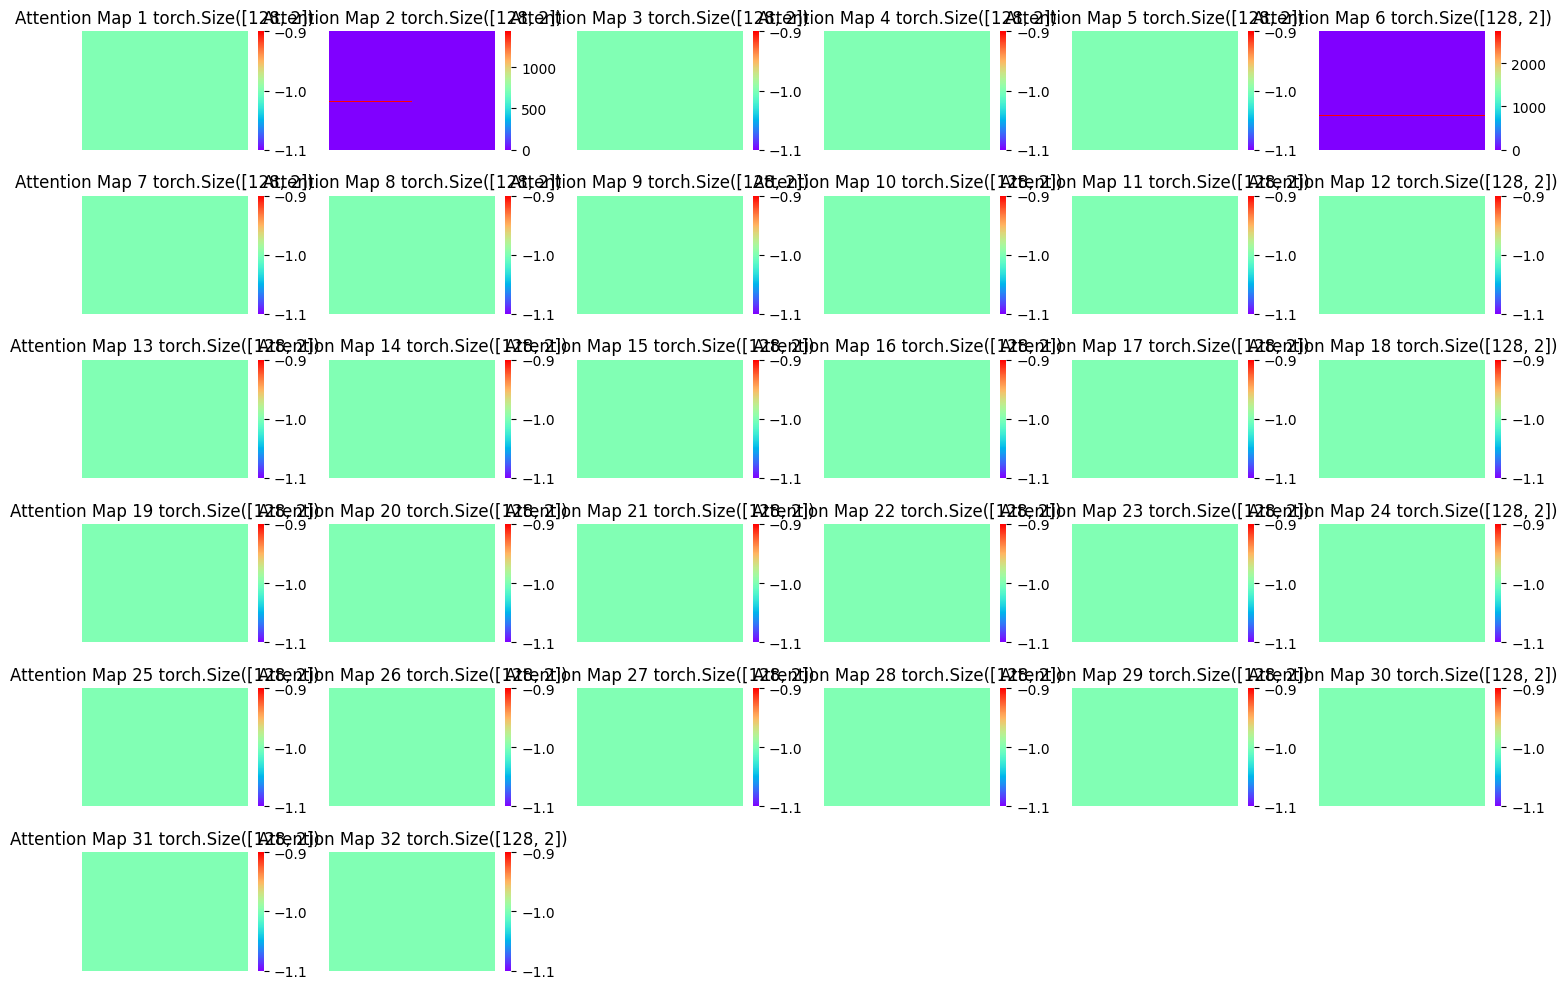

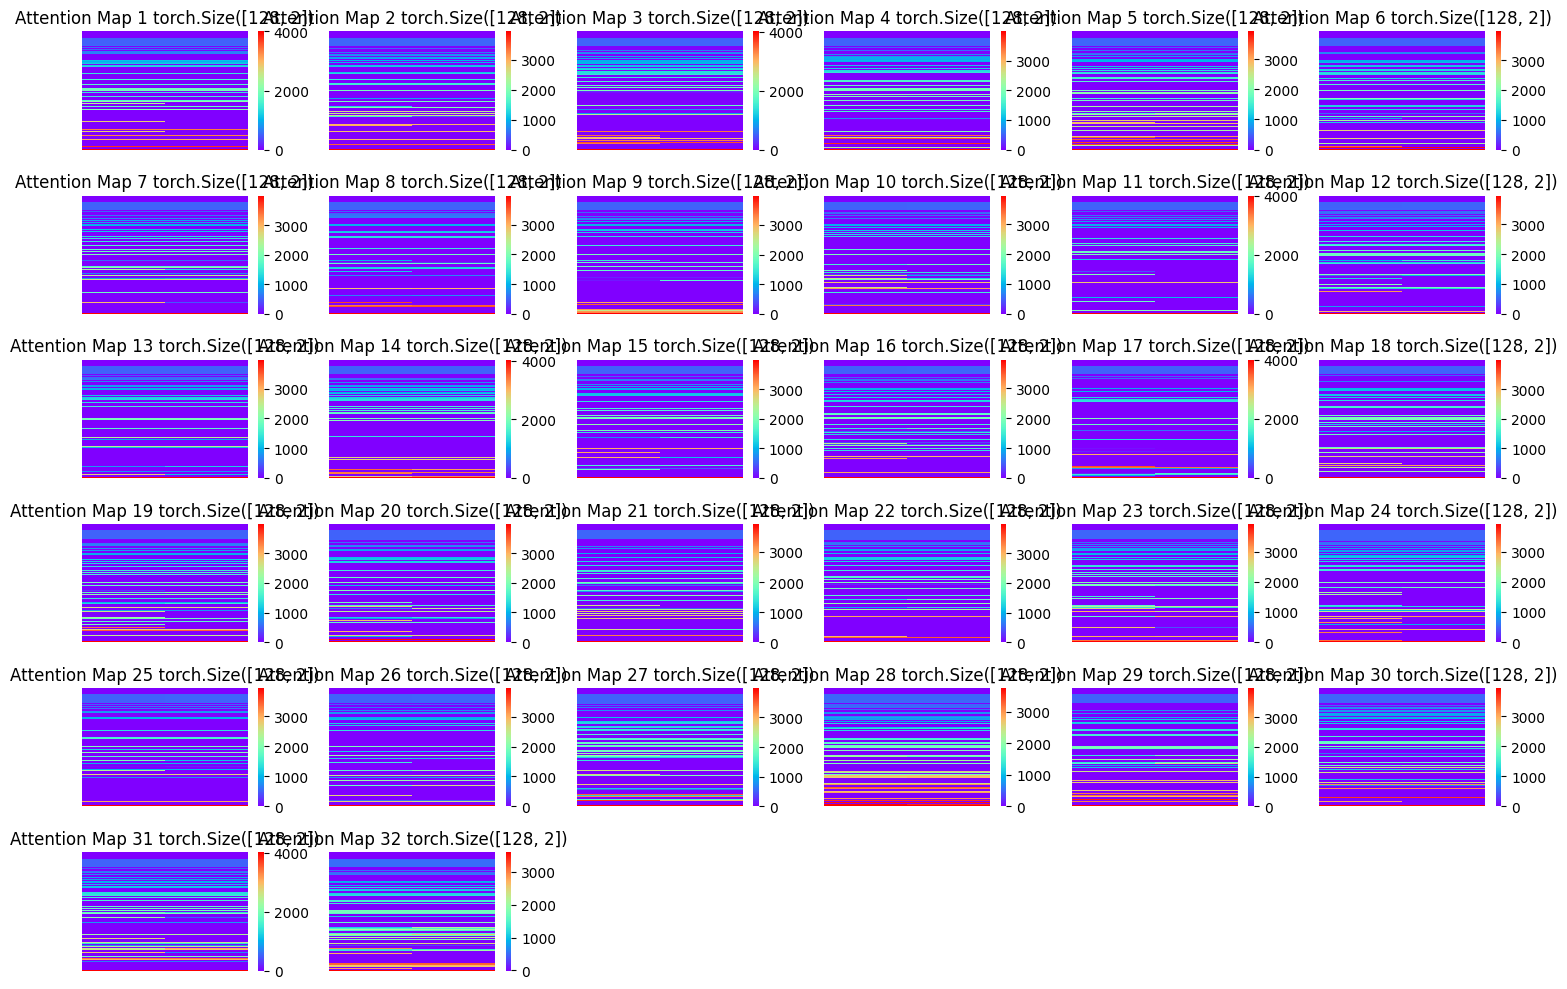

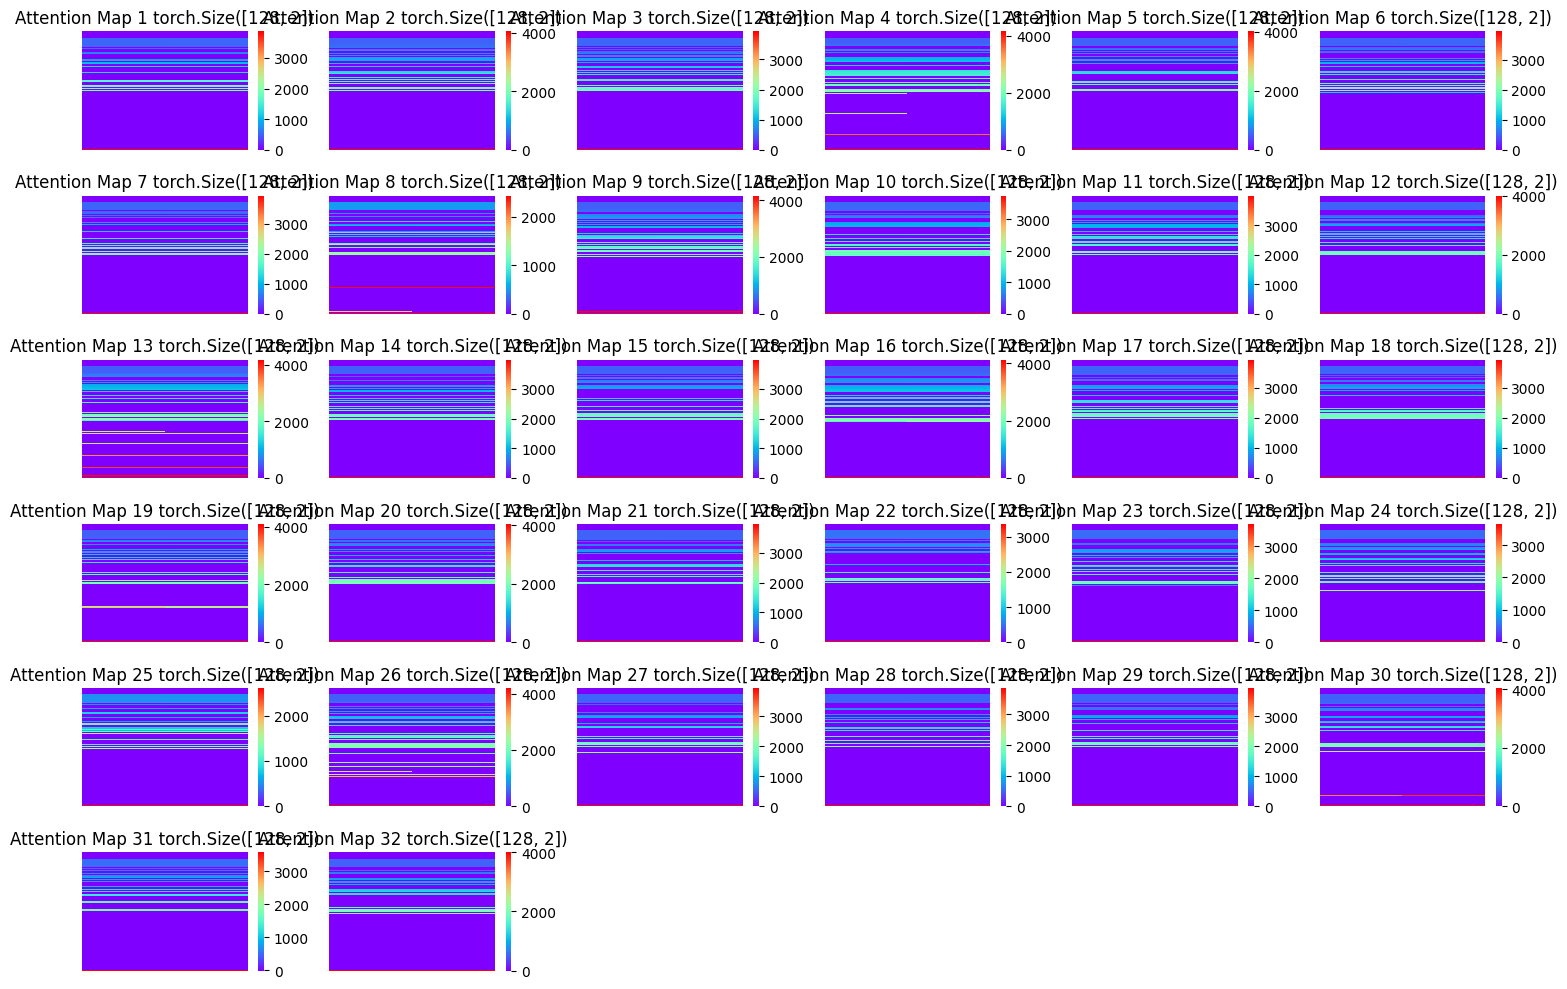

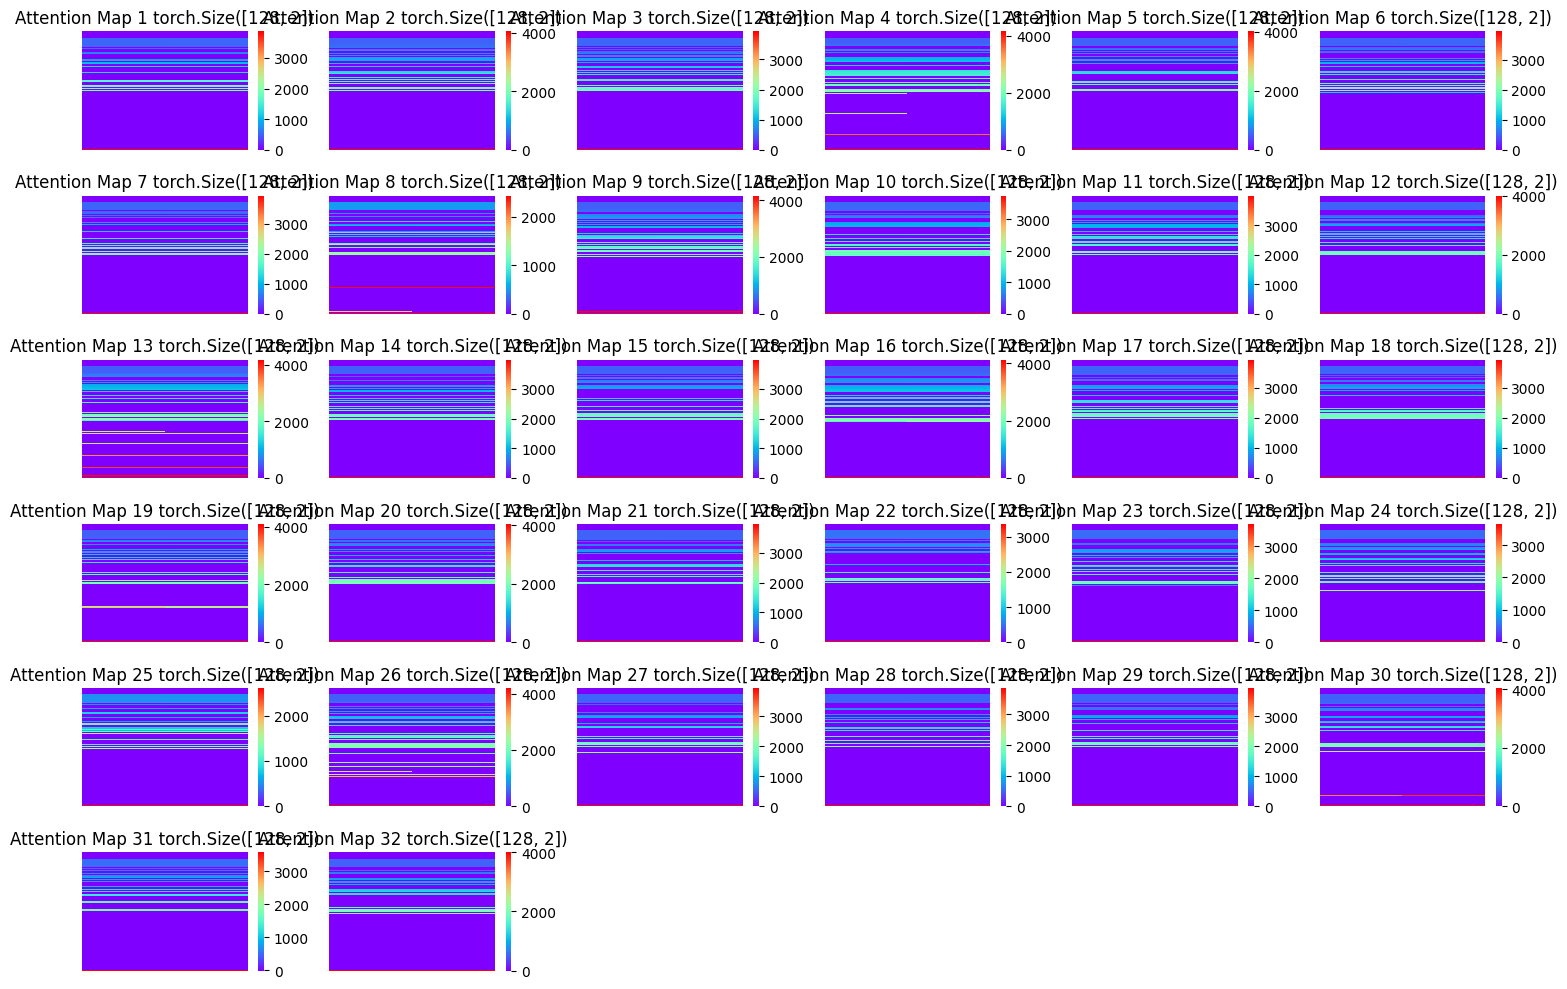

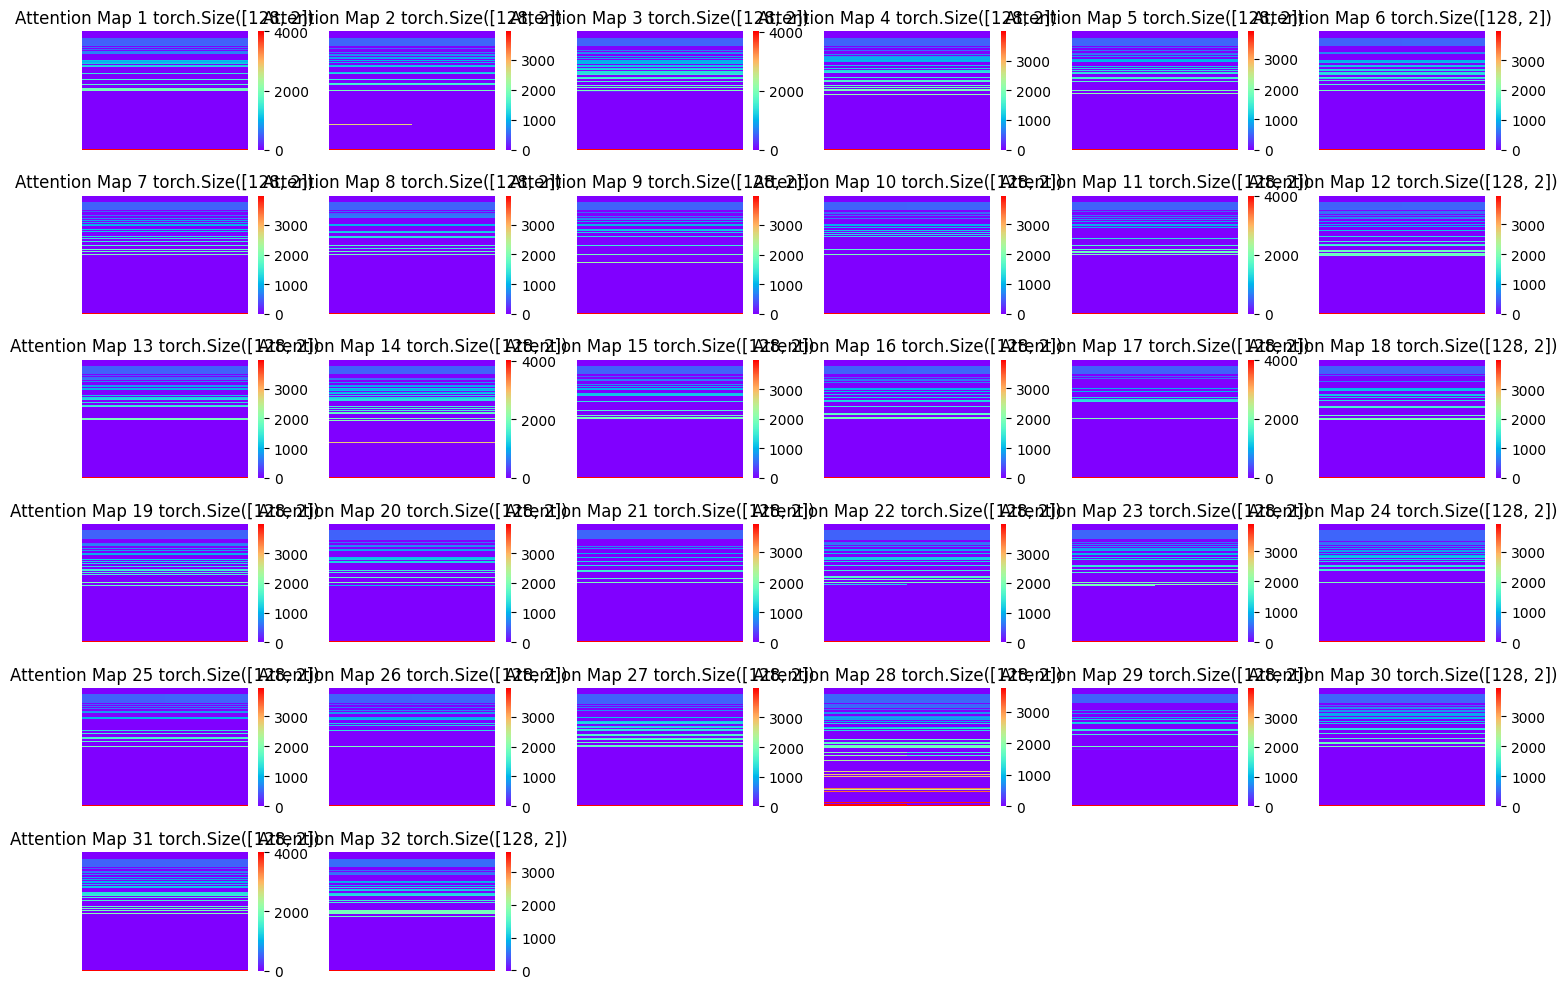

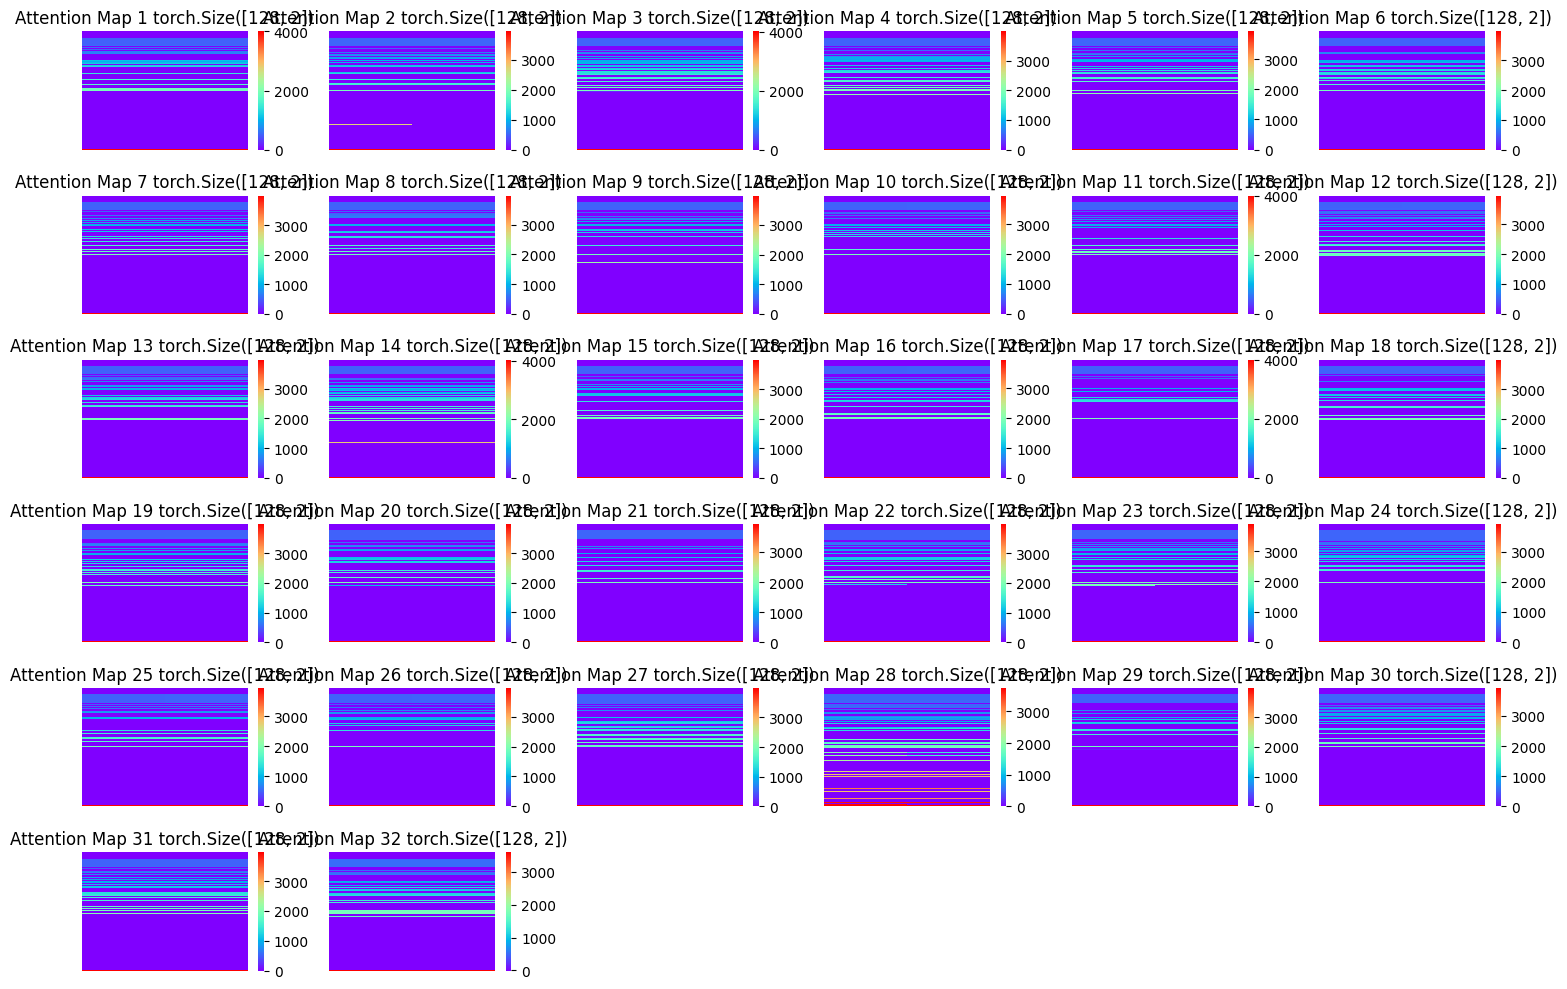

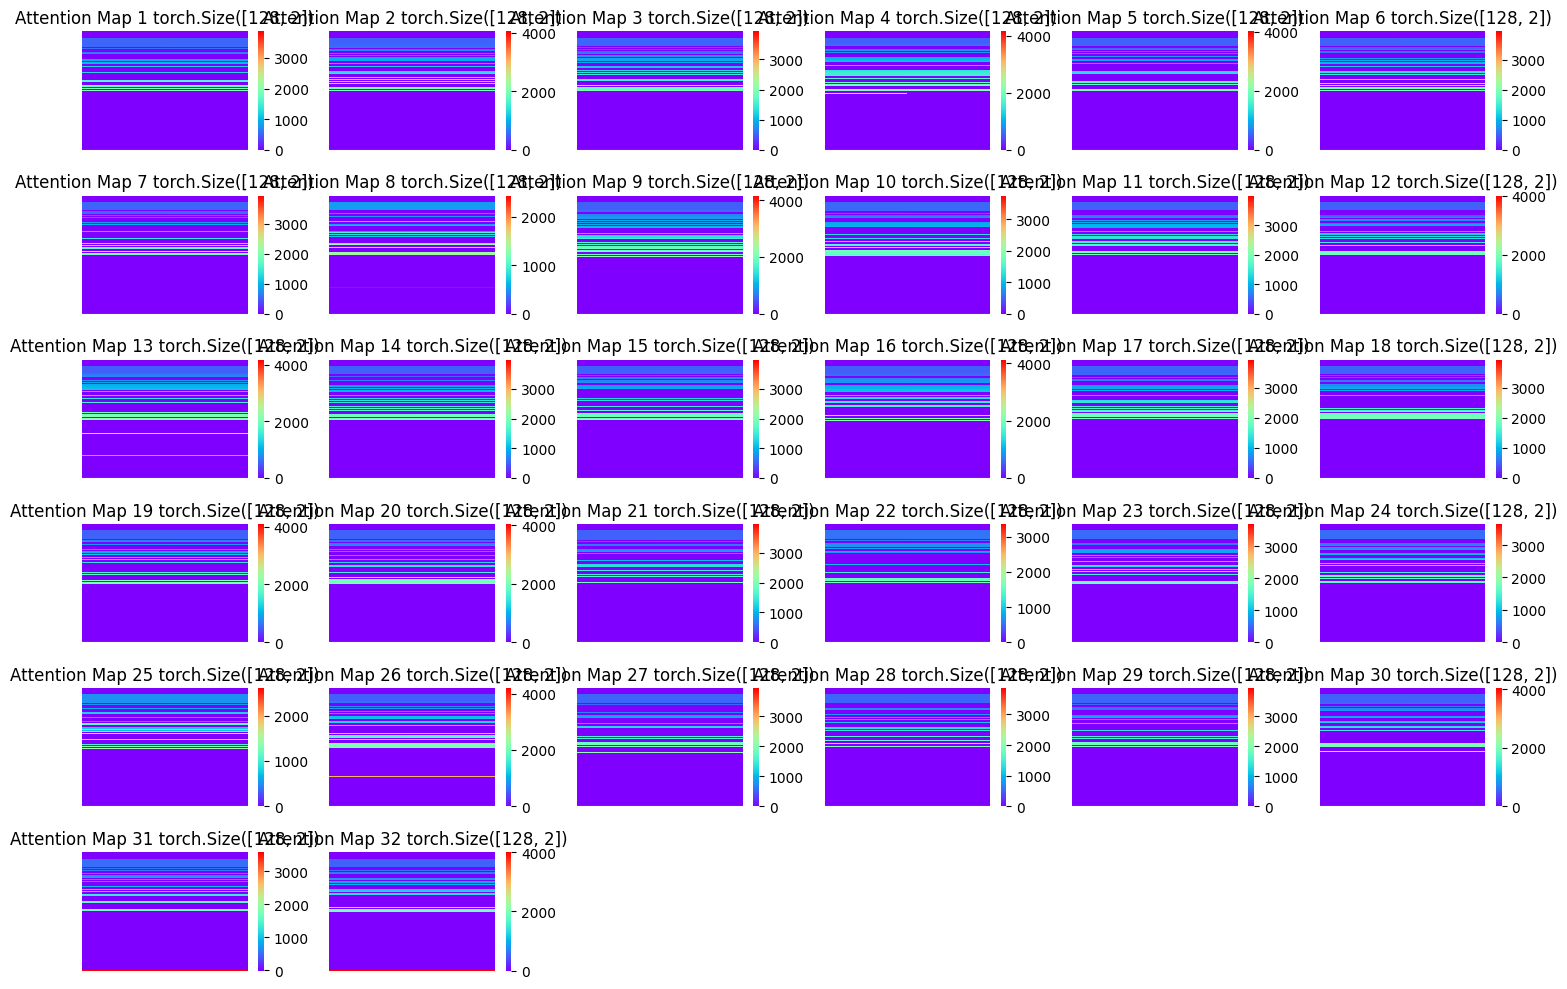

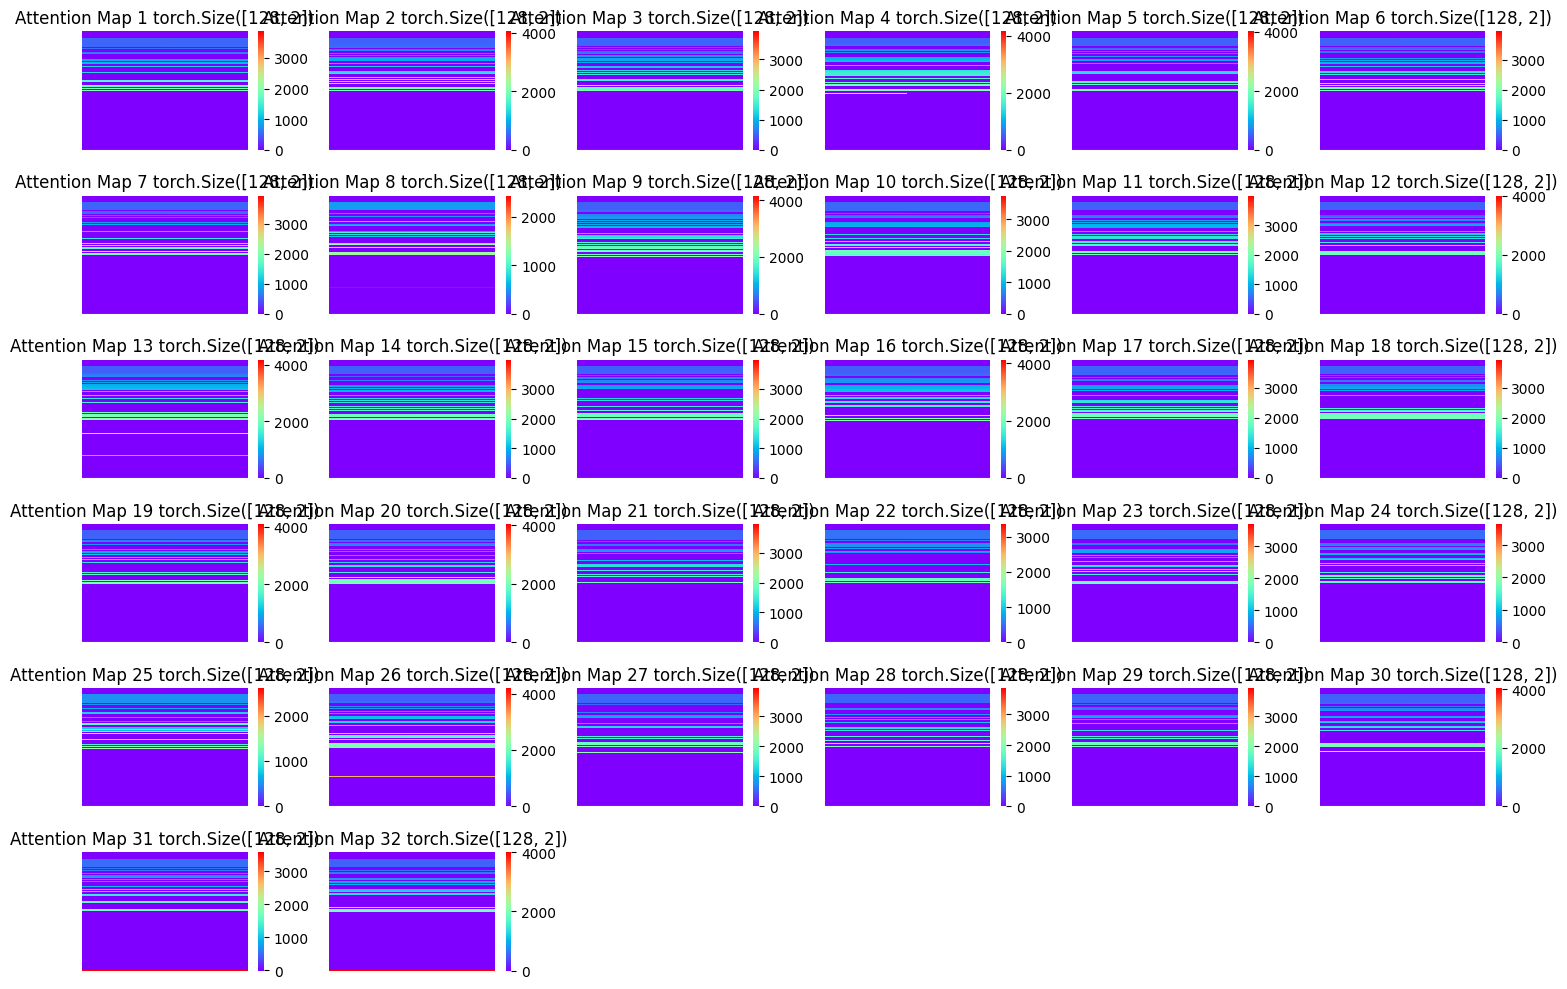

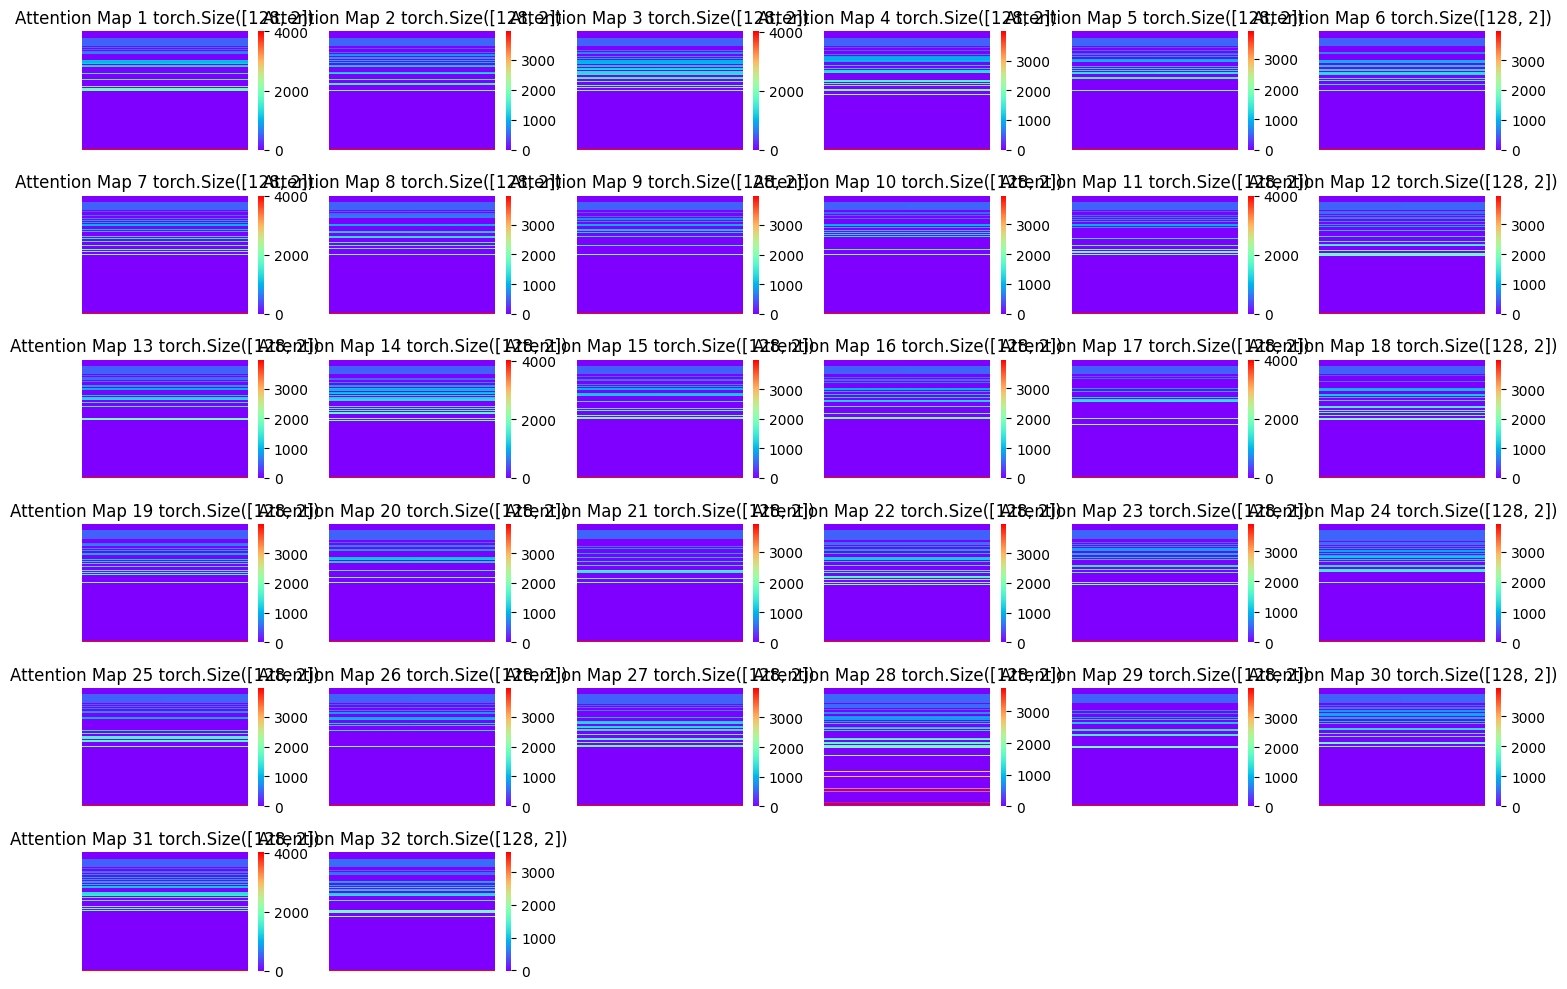

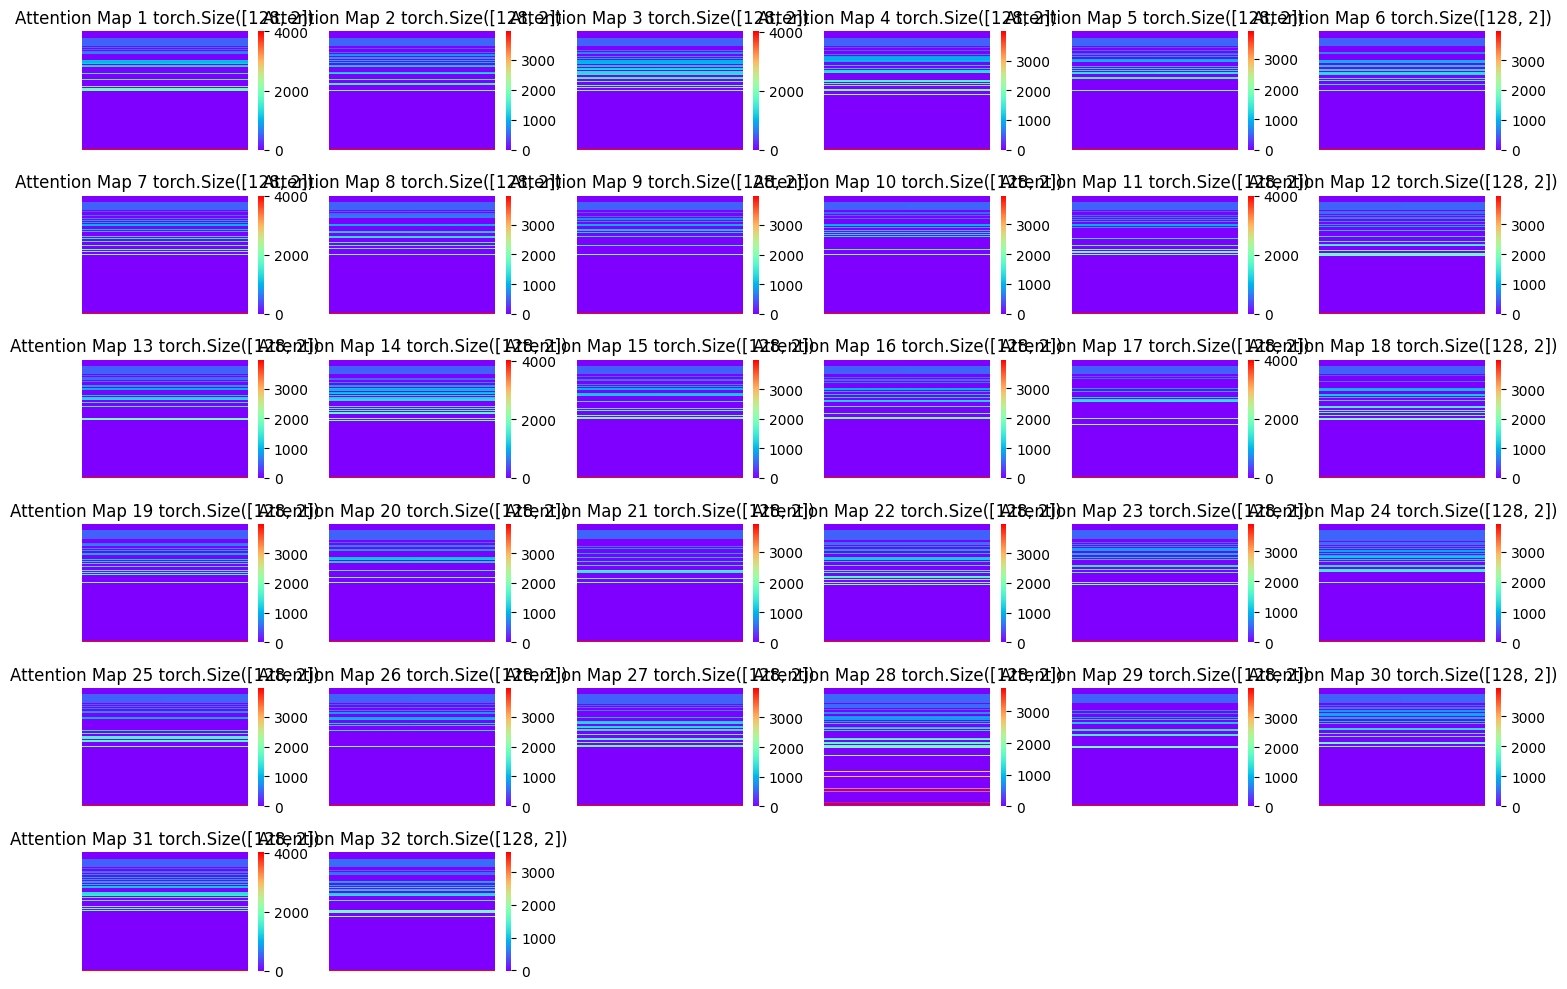

In [262]:
for tl in tlist:
    plot_attention_maps(tl['indices'][:,:,-2:], cmap='rainbow')  # Change cmap as needed
    print("===========")


In [263]:
# for t in tlist:
#     print(t)

In [264]:
len(tlist)

16

In [265]:
tlist[0]['indices'][16,:,-2:]

tensor([[32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [32000., 32000.],
        [320

In [266]:
tlist[0]['indices'].shape

torch.Size([32, 128, 421])

In [267]:
torch.all(tlist[0]['indices'][:,:,267:]==32000).item()

False

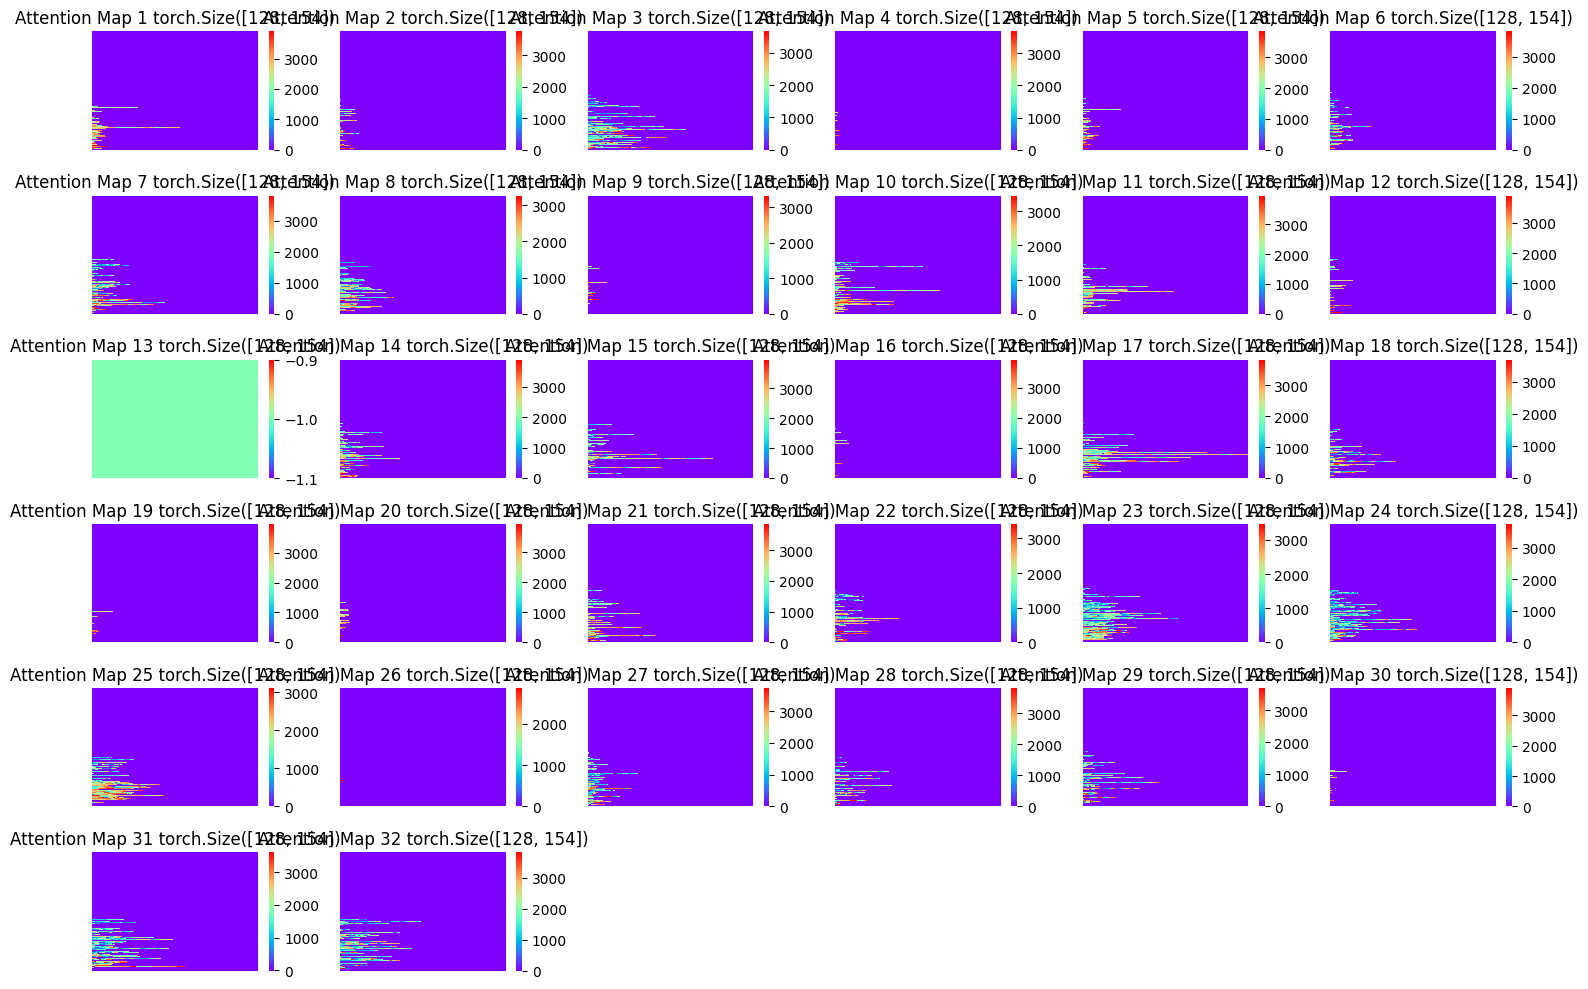

In [268]:
plot_attention_maps(tlist[0]['indices'][:,:,267:], cmap='rainbow')  # Change cmap as needed


In [269]:
tlist[0]['indices'][:,:,266:]

tensor([[[32000., 32000., 32000.,  ..., 32000., 32000., 32000.],
         [32000., 32000., 32000.,  ..., 32000., 32000., 32000.],
         [32000., 32000., 32000.,  ..., 32000., 32000., 32000.],
         ...,
         [ 3550.,  3552.,  3554.,  ..., 32000., 32000., 32000.],
         [ 3376.,  3378.,  2570.,  ..., 32000., 32000., 32000.],
         [32000., 32000., 32000.,  ..., 32000., 32000., 32000.]],

        [[32000., 32000., 32000.,  ..., 32000., 32000., 32000.],
         [32000., 32000., 32000.,  ..., 32000., 32000., 32000.],
         [32000., 32000., 32000.,  ..., 32000., 32000., 32000.],
         ...,
         [32000., 32000., 32000.,  ..., 32000., 32000., 32000.],
         [ 3102.,  3104.,  3340.,  ..., 32000., 32000., 32000.],
         [32000., 32000., 32000.,  ..., 32000., 32000., 32000.]],

        [[32000., 32000., 32000.,  ..., 32000., 32000., 32000.],
         [32000., 32000., 32000.,  ..., 32000., 32000., 32000.],
         [32000., 32000., 32000.,  ..., 32000., 32000., 32

In [270]:
filtered_mask.shape, columns_with_all_negative_one.shape

(torch.Size([2, 3, 6]), torch.Size([3, 6]))

In [271]:
columns_with_all_negative_one

tensor([[False, False, False, False,  True, False],
        [ True, False, False, False, False, False],
        [ True, False, False,  True, False, False]])

In [272]:
columns_with_all_negative_one.sum(dim=0).shape

torch.Size([6])

In [273]:
tlist[0]

{'q': tensor([[[[ 2.8906e-01, -1.5703e+00,  2.2188e+00,  ..., -7.5781e-01,
             5.8203e-01, -8.6719e-01],
           [ 4.6094e-01, -8.1250e-01,  1.1797e+00,  ..., -7.2266e-01,
             5.6250e-01, -8.2031e-01],
           [ 7.8906e-01, -1.9531e+00,  2.0469e+00,  ..., -8.3984e-01,
             6.8750e-01, -1.0156e+00],
           ...,
           [ 5.2734e-01,  8.7109e-01,  1.2031e+00,  ..., -5.8203e-01,
             1.7480e-01, -8.4766e-01],
           [ 1.0938e-01,  1.3906e+00,  1.5781e+00,  ..., -1.0234e+00,
             8.0859e-01, -1.1406e+00],
           [-1.3672e-02,  1.8594e+00,  1.4062e+00,  ..., -1.0859e+00,
             7.8906e-01, -1.1797e+00]],
 
          [[ 5.0964e-03,  1.1475e-01, -4.5703e-01,  ...,  5.1172e-01,
            -9.6094e-01,  6.2109e-01],
           [ 4.9805e-01,  5.2979e-02, -1.5625e+00,  ..., -5.4688e-01,
             4.0820e-01, -5.3516e-01],
           [ 1.0449e-01,  4.8340e-02, -5.9766e-01,  ...,  2.2461e-01,
            -6.3672e-01,  3.0078e-

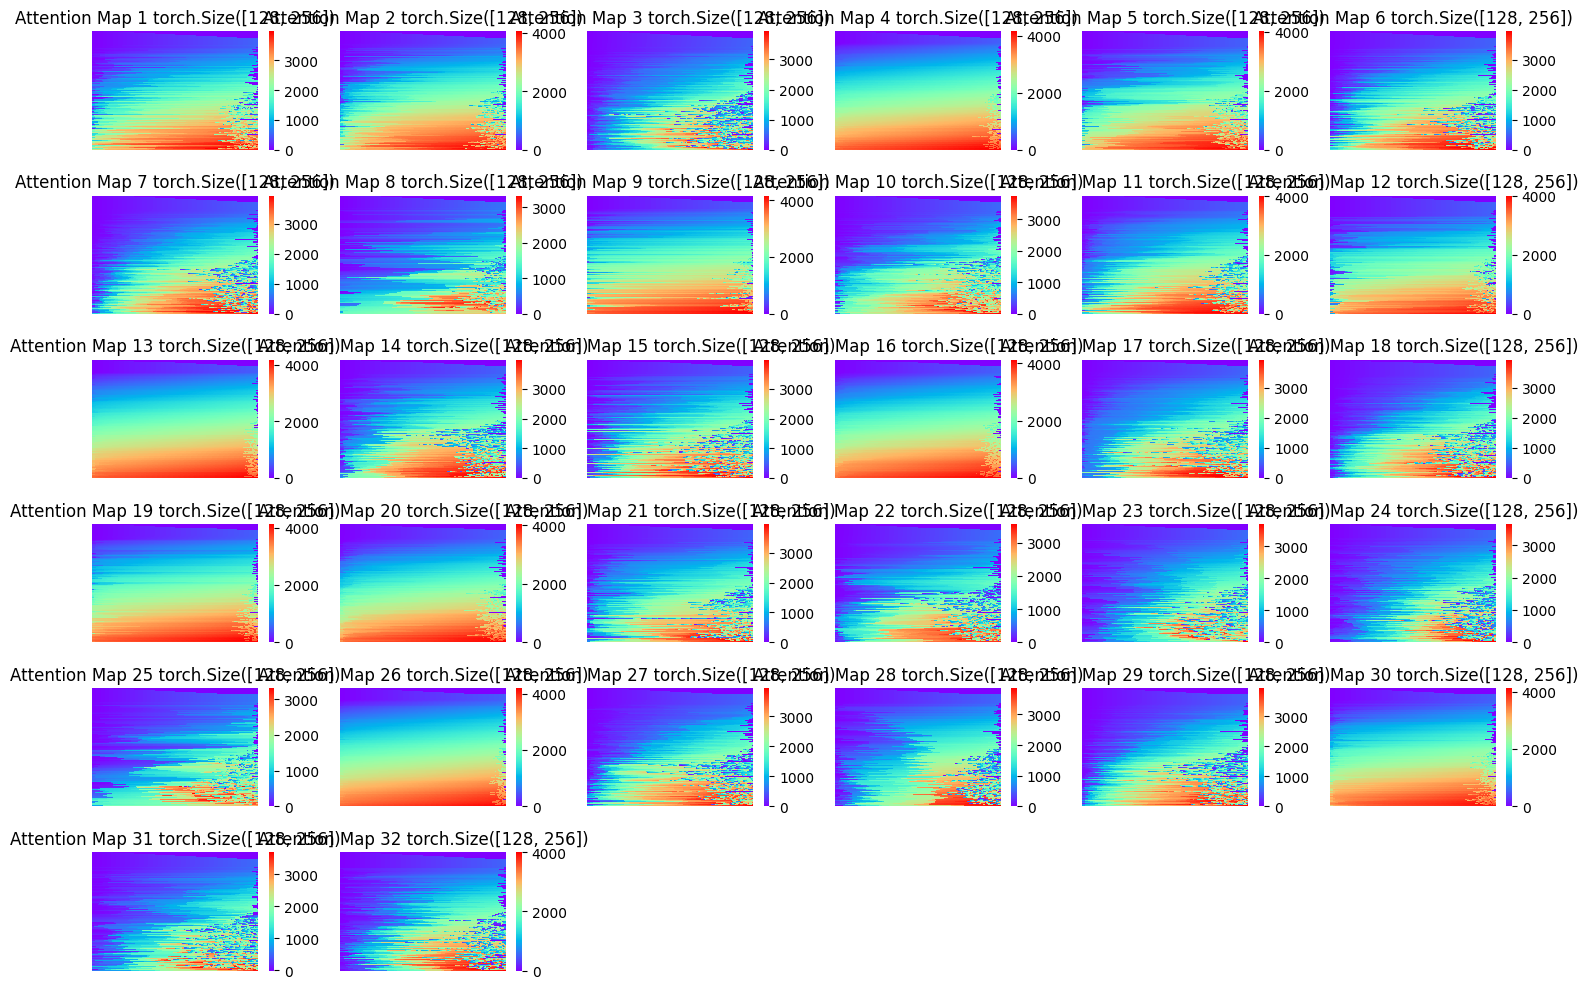

In [274]:
plot_attention_maps(tlist[1]['indices'], cmap='rainbow')  # Change cmap as needed


In [275]:
tlist[2]

{'q': tensor([[[[ 0.4375, -0.5117,  0.3125,  ..., -1.1250,  0.7305,  0.2051],
           [-0.5391, -0.2832,  0.0293,  ..., -0.3223,  1.0000, -0.4395],
           [-0.2148, -0.8633,  0.1035,  ..., -0.0265,  1.3828, -0.6328],
           ...,
           [-0.4727,  0.3652, -0.8945,  ..., -0.8984,  0.6641, -0.2773],
           [-0.6680, -0.0781, -0.6289,  ...,  2.4375,  3.3750,  0.8008],
           [-0.0684, -0.9375, -0.8164,  ...,  1.4375,  1.6484,  0.9805]],
 
          [[ 4.8750, -0.7500,  0.4453,  ...,  0.1865,  0.4395,  0.7695],
           [ 1.1562,  0.1836,  0.5977,  ..., -0.2002, -0.4160,  1.3672],
           [ 1.1094, -0.1426,  0.0242,  ...,  0.2910,  0.6484,  0.3281],
           ...,
           [-1.0547,  0.8828, -0.3594,  ...,  0.8047,  0.3711,  0.0210],
           [-0.7539, -0.1797,  0.1914,  ...,  0.2891,  2.0312,  1.6719],
           [-0.7578, -0.0190, -0.3867,  ..., -0.6211,  1.0312,  0.8242]],
 
          [[-0.0339, -0.3105, -0.8203,  ..., -0.3691,  0.5781, -1.2812],
        

In [276]:
# plot_attention_maps(tlist[2]['indices'], cmap='rainbow')  # Change cmap as needed
# 

In [277]:
tlist[3]


{'q': tensor([[[[ 3.9453e-01, -5.0781e-01,  3.1641e-01,  ..., -1.1094e+00,
             7.3047e-01,  1.8848e-01],
           [-5.9766e-01, -6.4453e-01, -6.0156e-01,  ..., -1.6504e-01,
             9.2969e-01, -6.9531e-01],
           [-6.6406e-01, -4.1016e-01, -6.5234e-01,  ..., -7.0312e-01,
             1.6406e+00, -6.4941e-02],
           ...,
           [ 2.5977e-01, -3.3398e-01, -1.4062e+00,  ..., -5.1172e-01,
             1.0352e-01,  8.7891e-01],
           [ 7.7344e-01, -5.5469e-01, -2.3594e+00,  ...,  8.2031e-01,
             8.4375e-01,  3.2959e-02],
           [ 5.8594e-02, -2.9688e-01, -1.2891e+00,  ...,  6.6406e-01,
            -1.8262e-01, -6.2500e-01]],
 
          [[ 4.8750e+00, -7.4219e-01,  4.4922e-01,  ...,  1.9531e-01,
             4.6094e-01,  7.7734e-01],
           [ 6.2891e-01,  4.4922e-01, -5.0659e-03,  ...,  1.4141e+00,
             1.1562e+00, -8.8281e-01],
           [ 7.0703e-01,  7.3047e-01,  7.3828e-01,  ...,  4.0820e-01,
             1.2812e+00, -7.2656e-

In [278]:
# plot_attention_maps(tlist[3]['indices'], cmap='rainbow')  # Change cmap as needed


In [279]:
tlist[4]

{'q': tensor([[[[ 5.0781e-01, -1.2109e+00,  2.1250e+00,  ..., -9.3359e-01,
             8.0078e-01, -1.0859e+00],
           [ 5.8203e-01, -1.5625e+00,  2.0469e+00,  ..., -9.2578e-01,
             7.5391e-01, -1.0547e+00],
           [ 9.0234e-01, -1.6406e+00,  1.8828e+00,  ..., -8.3984e-01,
             6.6797e-01, -9.9219e-01],
           ...,
           [ 8.2812e-01,  1.5547e+00,  1.3438e+00,  ..., -6.4062e-01,
             2.2070e-01, -9.2188e-01],
           [ 3.6328e-01,  1.9375e+00,  1.5547e+00,  ..., -9.9219e-01,
             7.2656e-01, -1.1484e+00],
           [-7.2266e-02,  2.0156e+00,  1.4062e+00,  ..., -1.1016e+00,
             8.5938e-01, -1.2031e+00]],
 
          [[ 2.0605e-01, -8.8501e-03, -9.6094e-01,  ...,  8.3008e-02,
            -3.4570e-01,  1.2158e-01],
           [ 2.1289e-01,  5.5176e-02, -8.8281e-01,  ...,  2.7710e-02,
            -3.4961e-01,  8.1543e-02],
           [ 6.0059e-02,  2.0508e-02, -7.5781e-01,  ...,  2.1875e-01,
            -6.2891e-01,  3.0469e-

In [280]:
# plot_attention_maps(tlist[4]['indices'], cmap='rainbow')  # Change cmap as needed


In [281]:
tlist[5]

{'q': tensor([[[[ 5.0781e-01, -1.2109e+00,  2.1250e+00,  ..., -9.3359e-01,
             8.0078e-01, -1.0859e+00],
           [ 5.8203e-01, -1.5625e+00,  2.0469e+00,  ..., -9.2578e-01,
             7.5391e-01, -1.0547e+00],
           [ 9.0234e-01, -1.6406e+00,  1.8828e+00,  ..., -8.3984e-01,
             6.6797e-01, -9.9219e-01],
           ...,
           [ 8.2812e-01,  1.5547e+00,  1.3438e+00,  ..., -6.4062e-01,
             2.2070e-01, -9.2188e-01],
           [ 3.6328e-01,  1.9375e+00,  1.5547e+00,  ..., -9.9219e-01,
             7.2656e-01, -1.1484e+00],
           [-7.2266e-02,  2.0156e+00,  1.4062e+00,  ..., -1.1016e+00,
             8.5938e-01, -1.2031e+00]],
 
          [[ 2.0605e-01, -8.8501e-03, -9.6094e-01,  ...,  8.3008e-02,
            -3.4570e-01,  1.2158e-01],
           [ 2.1289e-01,  5.5176e-02, -8.8281e-01,  ...,  2.7710e-02,
            -3.4961e-01,  8.1543e-02],
           [ 6.0059e-02,  2.0508e-02, -7.5781e-01,  ...,  2.1875e-01,
            -6.2891e-01,  3.0469e-

In [282]:
# plot_attention_maps(tlist[5]['indices'], cmap='rainbow')  # Change cmap as needed

In [283]:
import torch

tree_k = [512, 256, 128]
layer_id = [0,31]
default = []

for id in layer_id:
    for k in tree_k:
        default.append(torch.load(f'../../cache/llama/default/qkvout_k{k}_l{id}.pth', map_location=torch.device('cpu')))

In [284]:
default[0]

{'q': tensor([[[[ 0.3027, -0.7070,  1.2344,  ..., -0.6914,  0.5195, -0.8281],
           [ 0.5312, -1.5781,  2.1562,  ..., -0.9531,  0.7695, -1.0547],
           [ 0.7344, -1.1484,  1.6719,  ..., -0.8555,  0.7148, -0.9453],
           ...,
           [-1.1797,  0.4414, -0.1758,  ..., -0.7773,  0.4023, -0.8633],
           [-1.0938,  0.3789, -0.2432,  ..., -0.7773,  0.4023, -0.8633],
           [-0.9727,  0.3047, -0.3105,  ..., -0.7773,  0.4023, -0.8633]],
 
          [[ 0.3906, -0.0309, -1.5234,  ..., -0.5078,  0.3535, -0.4961],
           [ 0.1260,  0.0430, -0.7461,  ...,  0.1719, -0.5664,  0.2471],
           [ 0.3457, -0.0347, -1.3516,  ..., -0.1562, -0.0266, -0.1270],
           ...,
           [ 2.0156,  1.8906, -0.3242,  ..., -0.2578,  0.1553, -0.2373],
           [ 2.2812,  2.0312, -0.2285,  ..., -0.2578,  0.1553, -0.2373],
           [ 2.5000,  2.1562, -0.1270,  ..., -0.2578,  0.1553, -0.2373]],
 
          [[-0.6602, -0.5195, -0.5352,  ..., -0.4375, -0.3867, -0.3789],
        

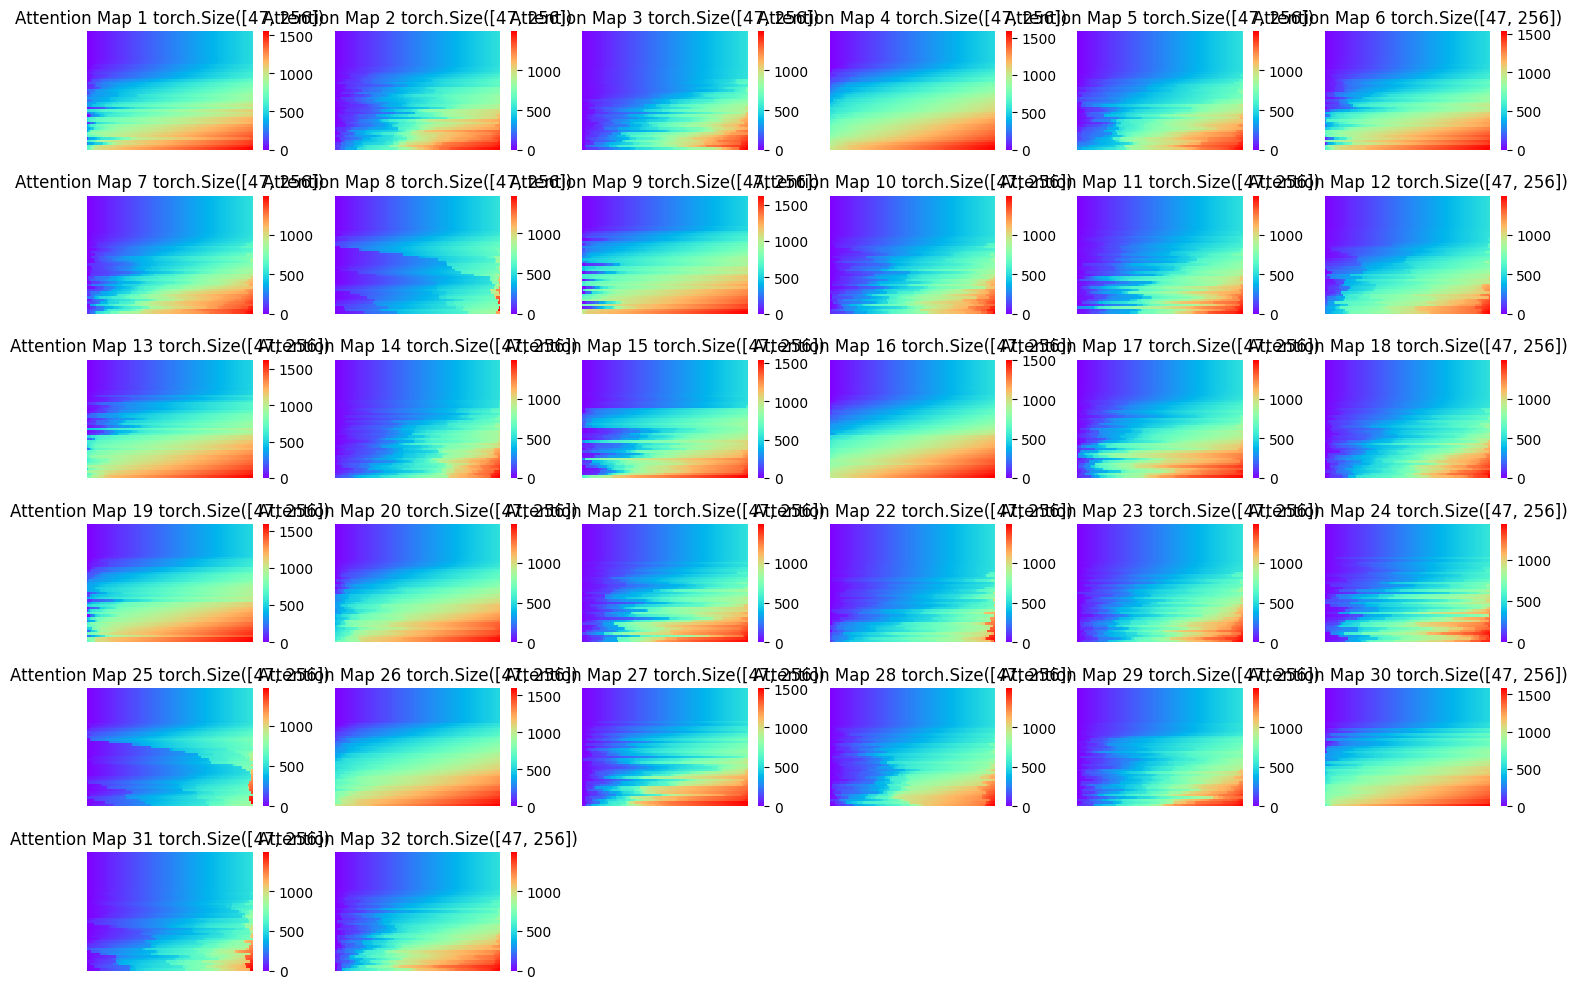

In [285]:
plot_attention_maps(default[0]['indices'], cmap='rainbow')  # Change cmap as needed


In [286]:
default[0]['q'].shape,
default[0]['k'].shape,

(torch.Size([1, 32, 1500, 128]),)

In [287]:
default[0]['indices']

tensor([[[   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         ...,
         [ 270,  272,  360,  ..., 1436, 1438, 1440],
         [ 648,  650,  652,  ..., 1494, 1496, 1498],
         [ 672,  674,  676,  ..., 1546, 1548, 1550]],

        [[   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         ...,
         [  72,   74,   76,  ..., 1420, 1430, 1432],
         [ 108,  110,  112,  ..., 1452, 1462, 1464],
         [ 104,  106,  108,  ..., 1484, 1490, 1492]],

        [[   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         ...,
         [   0,    2,    4,  ..., 1420, 1430, 1432],
         [   0,    2,    4,  ..., 1452, 1462, 1464],
         [   0,    2,    4,  ..., 1480, 1490, 1492]],

In [288]:
tlist[0]['indices']

tensor([[[0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         ...,
         [2.6300e+03, 2.6320e+03, 2.6340e+03,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [1.7660e+03, 1.7680e+03, 1.7700e+03,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [2.7200e+02, 2.7400e+02, 2.7600e+02,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04]],

        [[0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         ...,
         [2.7320e+03, 2.7340e+03, 2.7360e+03,  ..., 3.2000e+04,
          3.200